# Lakü: Customer Churn

    Lakü merupakan sebuah perusahaan yang berfokus dalam dunia bisnis digital, yang menyediakan layanan E-Commerce. Lakü sendiri merupakan E-Commerce B2C (Business to Customer) yang baru berdiri tahun 2022. Lakü dimiliki oleh seorang pengusaha muda bernama Pak Kevin.

In [321]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

# Data Splitting
from sklearn.model_selection import train_test_split 

# impute missing values
from sklearn.impute import SimpleImputer # mean, median, most_frequent (mode), constant
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # regresi
from sklearn.impute import KNNImputer # regresi KKN

# Data Scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

# encoding
from sklearn.preprocessing import OneHotEncoder
from category_encoders import BinaryEncoder

# column transformer & pipeline
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline

# cross validation
from sklearn.model_selection import cross_val_score

# algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
# Ensemble Various type
from sklearn.ensemble import VotingClassifier, StackingClassifier
# Ensemble Similar Type
from sklearn.ensemble import RandomForestClassifier      # Bagging
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier # Boosting
from xgboost.sklearn import XGBClassifier
from lightgbm import LGBMClassifier

# metric
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import make_scorer, fbeta_score
from sklearn.metrics import  classification_report, confusion_matrix, precision_recall_curve, ConfusionMatrixDisplay

# resampler
from imblearn.under_sampling import RandomUnderSampler, NearMiss
from imblearn.over_sampling import RandomOverSampler, SMOTE
 
# hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

import pickle

## **LATAR BELAKANG**
---
Perkembangan teknologi saat ini sangat berkembang pesat, salah satunya memunculkan banyak peluang baru dalam dunia bisnis. Website merupakan salah satu bukti dari perkembangan teknologi untuk mendukung sebuah bisnis. Website sendiri memiliki berbagai jenis, salah satunya adalah E-Commerce. E-Commerce sendiri adalah penyebaran, pembelian, penjualan, dan pemasaran barang maupun jasa lewat media elektronik berupa internet atau jaringan komputer lainnya. Salah satu fokus utama dari sebuah E-Commerce adalah menarik banyak pelanggan baru.

Pelanggan mempengaruhi perkembangan E-Commerce jangka panjang, karena itu salah satu hal yang harus diperhatikan oleh pemilik E-Commerce yaitu retensi pelanggan. Retensi pelanggan merupakan kemampuan perusahaan untuk mempertahankan pelanggannya dalam beberapa periode tertentu. Retensi pelanggan dipengaruhi dengan tingkat pelanggan yang meninggalkan perusahaan dalam waktu tertentu (Churn Rate), jika tingkat Churn tinggi berarti perusahaan memiliki tingkat retensi pelanggan yang rendah. Oleh karena itu, penting untuk menganalisa / memperhatikan tingkat Churn untuk mempertimbangkan langkah yang harus perusahaan ambil untuk menangani pelanggan.
    
    "Pada dasarnya disaat kehilangan pelanggan, sebetulnya mereka tidak sepenuhnya hilang. Mereka hanya mengambil istirahat dari menggunakan perusahaan anda. Saatnya anda, untuk mengambil langkah untuk membuat mereka mereka kembali"



---
Sumber:
- https://www.niagahoster.co.id/blog/apa-itu-ecommerce/
- https://www.returnlogic.com/blog/what-is-customer-churn-in-ecommerce/
- https://en.wikipedia.org/wiki/Customer_retention

## **PERMASALAHAN UMUM**
---
Sebagai pemilik perusahaan yang berfokus kepada pelanggan, Pak Kevin menginginkan usahanya terus berkembang lebih baik. Beliau sudah mendata pelanggan sejak awal membuka usahanya, karena mengetahui pentingnya pelanggan untuk membuat E-Commercenya terus berkembang. Pak Kevin, memahami bahwa untuk mencari pelanggan baru membutuhkan dana 5x - 25x lebih besar dari pada menjual kepada pelanggan yang sudah pernah menggunakan E-Commercenya. Selain membuat pengeluaran yang minimal, meningkatkan retensi pelanggan sebesar 5% saja dapat meningkatkan profit sebanyak 25% - 95%.

Oleh karena itu, Pak Kevin ingin menjaga dan meningkatkan tingkat retensi pelanggan perusahaanya. Cara yang ingin dilakukan oleh Pak Kevin, dalam hal ini terdapat 2 fokus yaitu:

    1. Memberikan reward khusus untuk pelanggan setia.
    2. Memberikan penawaran khusus seperti discount/promo untuk pelanggan yang terdeteksi Churn/ berhenti menggunakan E-Commercenya.

Pak Kevin, memberikan budget potongan harga sebesar 30% untuk pelanggan loyal, dan 70% untuk pelanggan yang mulai berhenti. Tim E-Commerce mengasumsikan saja besaran harga barang yang pelanggan beli yaitu Rp. 100.000, sehingga ditemukan budget potongan harga adalah Rp. 30.000/pelanggan loyal dan Rp. 70.000/pelanggan mulai berhenti. Tim E-Commerce menentukan bahwa berdasarkan data yang ada maka terdapat 3270 pelanggan di E-Commerce Lakü. Oleh karena itu tim E-Commerce melakukan perhitungan, yang menghasilkan:

    Pelanggan Loyal    = Rp. 30.000 
    Pelanggan Berhenti = Rp. 70.000 
    Biaya Pelanggan Baru = 10 x Rp 70.000 = Rp. 700.000

Kondisi perusaahan saat ini memberikan semua customernya promosi sebesar Rp. 30.000 karena berasumsi semua orang tidak akan churn.
Tim E-Commerce menghubungi seorang Data Scientist untuk membuat sistem untuk memprediksi apakah pelanggannya akan berhenti atau tetap loyal, untuk memaksimalkan penggunaan uang perusahaan. Data Scientist membaca data pelanggan yang diberikan tim E-Commerce tersebut dan melihat target yaitu:

    - 0: Merupakan pelanggan yang loyal.
    - 1: Merupakan pelanggan yang mulai berhenti menggunakan E-Commerce Lakü.

Data Scientist membuat metric:

    FP/False Positif: Machine Learning akan memprediksi pelanggan akan berhenti, namun pada kenyataannya pelanggan tetap loyal menggunakan E-Commerce Lakü. Jika seperti ini maka perusahaan akan menggeluarkan budget berlebih untuk pelanggan yang loyal.

    FN/False Negatif: Machine Learning akan memprediksi pelanggan loyal, namun pada kenyataannya pelanggan akan berhenti menggunakan E-Commerce Lakü. Jika seperti ini maka perusahaan akan mengeluarkan budget yang lebih hemat untuk pelanggan yang akan berhenti. Dengan resiko mencari pelanggan baru yang biayanya kita asumsikan saja berdasarkan pemahaman Pak Kevin, lebih mahal 10x dari biaya memberikan penawaran khusus. 

Dengan pemikiran untuk mendapatkan pelanggan baru biayanya 10x lebih mahal dari pada penawaran khusus untuk pelanggan yang berhenti, tentu saja data scientist akan memperkecil kemungkinan membuang biaya 10x lebih mahal tersebut untuk mencari pelanggan baru. Oleh karena itu, model Machine Learning yang dibuat akan berfokus untuk memperkecil kemungkinan kesalahan prediksi FN, dengan metric evaluasi **F2** untuk memaksimalkan deteksi pelanggan yang akan berhenti dengan benar, tetapi juga tetap memperhatikan biaya yang kemungkinan terbuang karena kesalahan memprediksi pelanggan loyal menjadi pelanggan churn.

     
---
Sumber:
- Marketing Metrics: The Definitive Guide to Measuring Marketing Performance 2nd ed. Edition
- https://blog.myskill.id/dunia-kerja/retensi-pelanggan-adalah/

## **1. Read Dataset & Data Understanding**
---
    Pak Kevin memberikan dataset customernya kepada data scientist untuk dilakukan pemahaman data.

In [217]:
df = pd.read_csv('data_ecommerce_customer_churn.csv')
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [218]:
df[df['Churn'] == 0].head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [219]:
df[df['Churn'] == 1].head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73,1
12,1.0,7.0,4,Mobile Phone,3,Divorced,5,0,3.0,154.09,1
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1
17,8.0,22.0,4,Fashion,2,Divorced,3,0,6.0,204.78,1
19,0.0,18.0,1,Mobile,4,Single,2,0,0.0,127.16,1


In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


### HASIL PEMAHAMAN DATASET
---
    Dataset yang diberikan oleh Pak Kevin, memiliki 3941 baris dan 11 columns. Dengan columns, yaitu:
    - Tenure                       : Masa aktif pelanggan di perusahaan
    - WarehouseToHome              : Jarak antara gudang ke rumah pelanggan
    - NumberOfDeviceRegistered     : Jumlah perangkat yang terdaftar oleh pelanggan tertentu
    - PreferedOrderCat             : Kategori terakhir yang di order oleh pelanggan pada bulan2 terakhir
    - SatisfactionScore            : Nilai kepuasan dari pelanggan untuk perusahaan
    - MaritalStatus                : Status pernikahan pelanggan
    - NumberOfAddress              : Jumlah alamat yang ditambahkan oleh pelanggan tertentu
    - Complain                     : Adakah komplain yang dilakukan oleh pelanggan tertentu
    - DaySinceLastOrder            : Hari terakhir sejak pelanggan melakukan pembelian
    - CashbackAmount               : Rata-rata pengembalian uang pada bulan terakhir
    - Churn                        : Pendeteksi apakah pelanggan sudah tidak menggunakan E-Commerce Lakü
    
    "Melalui dataset tersebut data scientist melihat, ternyata jika Churn = 0 maka pelanggan terdeteksi sebagai pelanggan loyal. Sebaliknya jika Churn = 1, maka pelanggan tersebut terdeteksi sebagai pelanggan yang akan berhenti menggunakan E-Commerce Lakü"
---

## **2. Data Cleaning**
---
    Data scientist melakukan pembersihan data terhadap data yang diberikan oleh Pak Kevin.

### Menampilkan jumlah nilai unique dan samplenya
    Dilakukan penampilan nilai unique pada setiap kolom, sebagai pemahaman data dan juga menentukan apakah ada nilai unique yang perlu dilakukan pembersihan data.

In [221]:
pd.set_option('display.max_colwidth', None)
# data uni di tiap kolom
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0, 6.0, 16.0, 10.0, nan, 8.0, 19.0, 0.0, 3.0, 5.0, 9.0, 18.0, 12.0, 24.0, 4.0, 61.0, 25.0, 13.0, 14.0, 2.0, 21.0, 29.0, 26.0, 23.0, 31.0, 22.0, 28.0, 51.0, 60.0, 50.0]"
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0, 26.0, 20.0, 14.0, 8.0, 21.0, 22.0, 27.0, 18.0, 33.0, 9.0, 17.0, nan, 6.0, 31.0, 28.0, 10.0, 19.0, 32.0, 23.0, 30.0, 35.0, 34.0, 24.0, 5.0, 36.0, 127.0]"
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, Mobile Phone, Grocery]"
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0, 0.0, 14.0, 9.0, 10.0, 12.0, 5.0, 17.0, 30.0, 18.0, 16.0, 13.0, 15.0, 46.0, 31.0]"
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.81, 149.51, 154.73, 137.02, 157.43, 221.1, 180.38, 154.09, 231.09, 163.92, 193.15, 121.68, 204.78, 259.96, 127.16, 191.96, 153.01, 126.7, 189.98, 205.95, 148.5, 175.1, 124.32, 204.82, 228.06, 196.13, 205.52, 262.44, 125.46, 123.67, 123.22, 264.73, 122.18, 141.94, 172.87, 139.29, 207.48, 208.92, 296.59, 120.08, 197.64, 151.95, 171.8, 174.84, 152.96, 140.11, 303.75, 226.24, 265.55, 156.47, 179.84, 145.29, 123.68, 268.36, 154.29, 125.64, 144.78, 129.11, 165.31, 135.81, 148.4, 149.5, 136.6, 204.35, 208.46, 125.17, 217.41, 224.9, 211.21, 143.93, 146.68, 167.49, 149.0, 163.49, 145.38, 190.24, 140.69, 188.58, 222.13, 122.7, 141.98, 145.97, 262.34, 140.25, 219.04, 197.56, 179.91, 120.75, 189.66, 110.91, 188.37, 239.16000000000005, 145.08, 179.88, 127.78, ...]"


### Menghapus baris/data yang duplikat/sama
    Dilakukan penghapusan terhadap baris data yang memiliki kesamaan dengan baris lainnya / duplikat.

In [222]:
df.shape

(3941, 11)

In [223]:
df.duplicated().sum()

671

In [224]:
df.loc[df.duplicated(keep=False)].sort_values(['Tenure','WarehouseToHome','NumberOfDeviceRegistered'])

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
300,0.0,6.0,3,Mobile,4,Single,2,1,4.0,132.02,1
575,0.0,6.0,3,Mobile,4,Single,2,1,4.0,132.02,1
2974,0.0,6.0,3,Laptop & Accessory,4,Married,2,0,4.0,163.97,0
3576,0.0,6.0,3,Laptop & Accessory,4,Married,2,0,4.0,163.97,0
640,0.0,6.0,4,Mobile Phone,3,Single,1,1,2.0,137.30,1
...,...,...,...,...,...,...,...,...,...,...,...
1086,NaN,30.0,4,Mobile,3,Single,6,1,3.0,120.28,1
2315,NaN,31.0,3,Mobile,4,Married,2,1,8.0,120.22,1
2394,NaN,31.0,3,Mobile,4,Married,2,1,8.0,120.22,1
3228,NaN,34.0,3,Mobile,1,Married,5,0,3.0,121.32,0


In [225]:
df = df.drop_duplicates()
df.shape

(3270, 11)

### Mengabungkan kategori pada kolom PreferedOrderCat

    Dilakukan penggabungan nama kategori pada kolom PreferedOrderCat, karena memiliki nama yang kurang lebihnya sama.

In [226]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace('Mobile', 'Mobile Phone')
df[df['PreferedOrderCat'] == 'Mobile']
# Data dengan kategori Mobile sudah hilang, digantikan dengan Mobile Phone

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn


### Melakukan pembulatan dengan 2 angka dibelakang koma pada kolom CashbackAmount
    Dilakukan pembulatan dengan 2 angka dibelakang koma.

In [227]:
df['CashbackAmount'] = df['CashbackAmount'].round(2)
df[['CashbackAmount']].head()

,CashbackAmount
0,143.32
1,129.29
2,168.54
3,230.27
4,322.17


### Melakukan pemeriksaan nilai kosong pada dataset
    Dilakukan pemeriksaan nilai kosong/missing value pada dataset.

In [228]:
df.isna().sum()
# Setelah dilakukannya pemeriksaan nilai kosong pada dataset, ternyata ditemukan 3 kolom yang memiliki nilai kosong yaitu 'Tenure','WarehouseToHome',dan 'DaySinceLastOrder'.

Tenure                      160
WarehouseToHome             135
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           181
CashbackAmount                0
Churn                         0
dtype: int64

In [229]:
# Menampilkan data sample dengan nilai kosong pada kolom Tenure
df.loc[df['Tenure'].isna()].head(3)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
16,NaN,21.0,5,Mobile Phone,1,Married,1,1,3.0,121.68,0
37,NaN,6.0,4,Mobile Phone,5,Married,2,0,2.0,122.18,0
44,NaN,7.0,4,Mobile Phone,3,Married,2,0,0.0,120.08,0


In [230]:
# Menampilkan data sample dengan nilai kosong pada kolom WarehouseToHome
df.loc[df['WarehouseToHome'].isna()].head(3)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
27,0.0,NaN,1,Mobile Phone,3,Single,4,1,3.0,124.32,1
33,0.0,NaN,4,Mobile Phone,4,Divorced,6,0,1.0,125.46,1
34,0.0,NaN,4,Mobile Phone,1,Married,6,0,3.0,123.67,1


In [231]:
# Menampilkan data sample dengan nilai kosong pada kolom DaySinceLastOrder
df.loc[df['DaySinceLastOrder'].isna()].head(3)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
10,6.0,26.0,6,Fashion,3,Married,5,0,NaN,221.10,0
13,1.0,7.0,5,Fashion,3,Divorced,7,0,NaN,231.09,1


### HASIL PROSES MEMBERSIHKAN DATA
--- 
    Dari melakukan proses membersihkan data, data scientist melakukan beberapa perubahan yang perlu, yaitu:
    1. Melakukan penghapusan pada baris yang sama/duplikat. (Sebelumnya 3941 baris --> Sesudah 3270 baris)
    2. Melakukan penggabungan kategori Mobile menjadi Mobile Phone.
    3. Melakukan pembulatan 2 angka dibelakang koma untuk nilai dollar pada kolom CashbackAmount.
    4. Melakukan pemeriksaan missing value, yang akan dilakukan penanganan pada proses Pre-Processing.   
---

## **3. Data Analysis**
---
    Data scientist melakukan analisa terhadap data yang diberikan oleh Pak Kevin. Tahap ini dilakukan supaya data scientist dapat memahami data, seperti melihat outlier pada data, rata-rata data, dan lain-lain.

### Mengelompokkan data
    Melakukan pengelompokkan data numerical dan categorical

In [232]:
data_num = df.describe().columns
data_num

Index(['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered',
       'SatisfactionScore', 'NumberOfAddress', 'Complain', 'DaySinceLastOrder',
       'CashbackAmount', 'Churn'],
      dtype='object')

In [233]:
data_cat = df.describe(include='object').columns
data_cat

Index(['PreferedOrderCat', 'MaritalStatus'], dtype='object')

#### Hasil:
--- 
    - Mendapatkan data numerical, pada kolom Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, Complain, DaySinceLastOrder, CashbackAmount, dan Churn.
    - Mendapatkan data categorical, pada kolom PreferedOrderCat, dan MaritalStatus
---

### Analisa berdasarkan kolom numerical dari dataset
    Melakukan analisa terhadap nilai dari setiap kolom numerical

In [234]:
df.describe().round(2)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3110.00,3135.00,3270.00,3270.00,3270.00,3270.00,3089.00,3270.00,3270.00
mean,10.19,15.51,3.68,3.02,4.22,0.28,4.55,177.42,0.16
std,8.65,8.57,1.02,1.40,2.62,0.45,3.70,49.31,0.37
min,0.00,5.00,1.00,1.00,1.00,0.00,0.00,0.00,0.00
25%,2.00,9.00,3.00,2.00,2.00,0.00,2.00,145.89,0.00
50%,9.00,13.00,4.00,3.00,3.00,0.00,3.00,163.88,0.00
75%,16.00,20.00,4.00,4.00,6.00,1.00,7.00,197.14,0.00
max,61.00,127.00,6.00,5.00,22.00,1.00,46.00,324.99,1.00


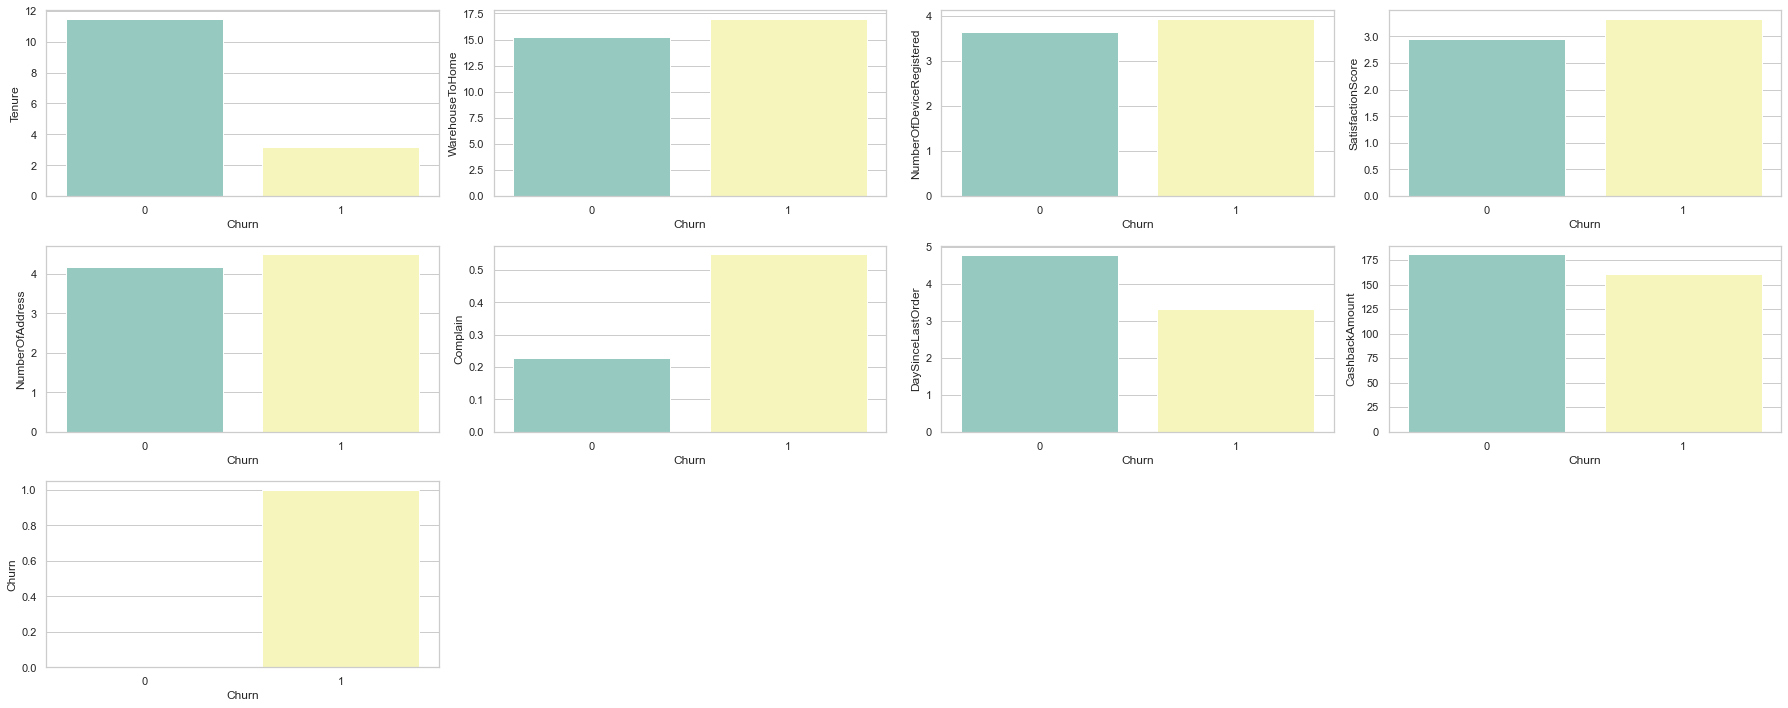

In [235]:
plt.figure(figsize=(25,10))

for col in range(len(data_num)):

    plt.subplot(3,4, col+1)
    sns.barplot(data=df, x='Churn', y=data_num[col], ci=0, estimator=np.mean)

plt.tight_layout()

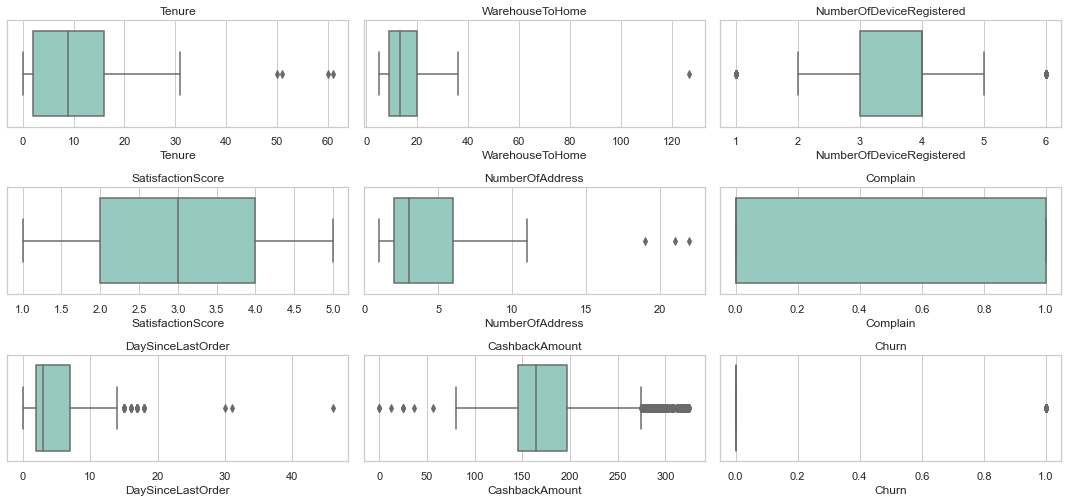

In [236]:
plt.figure(figsize=(15, 9), facecolor='white')
sns.set(style='whitegrid', palette='Set3')
plotnumber = 1
    
for feature in data_num:
    ax = plt.subplot(4,3, plotnumber)
    sns.boxplot(x=feature, data=df);
    plt.title(feature, fontsize=12)
    plt.tight_layout()
    plotnumber += 1

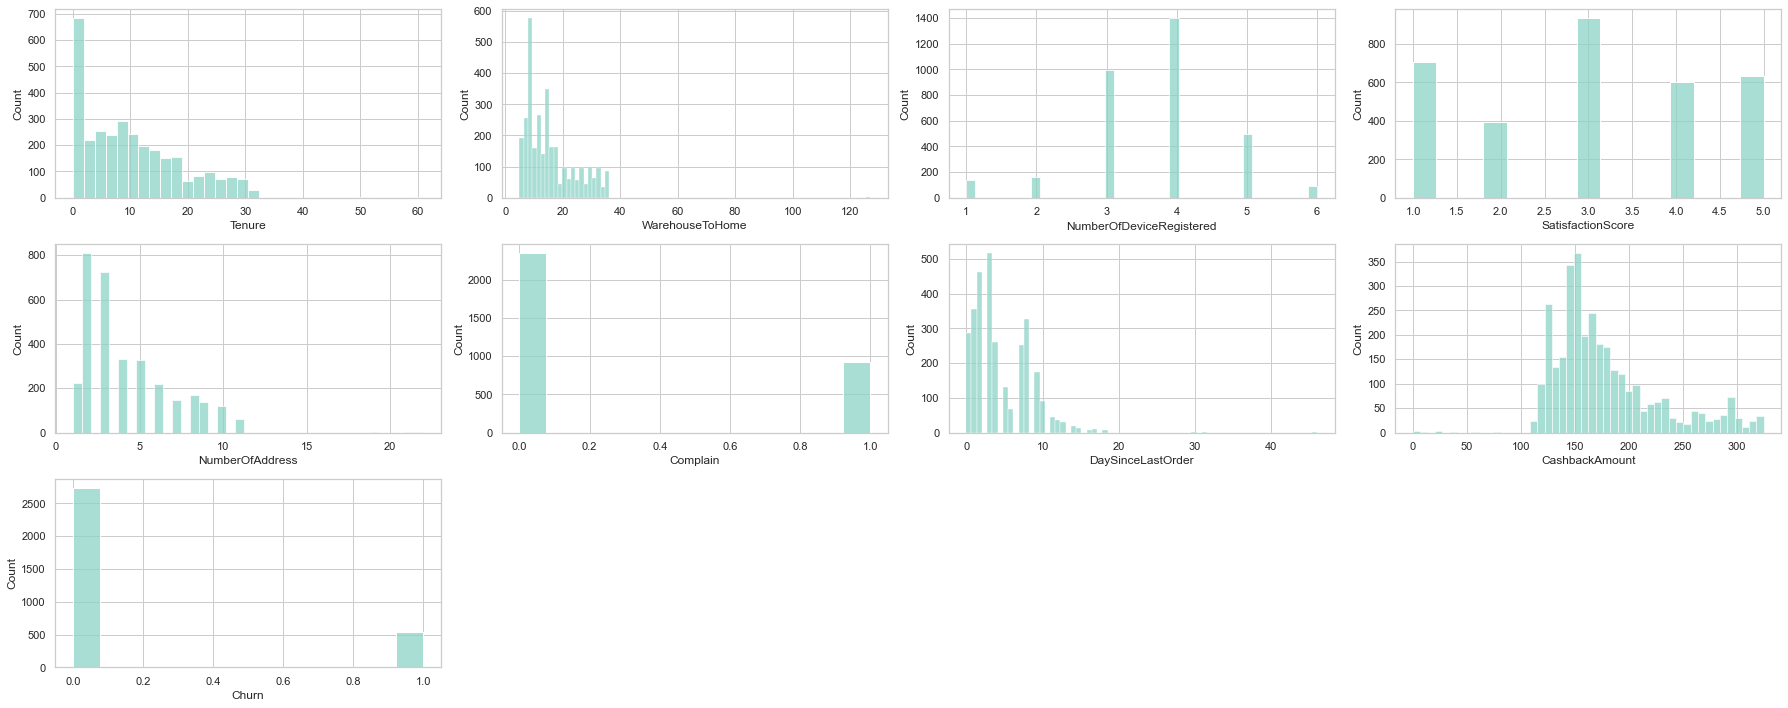

In [237]:
plt.figure(figsize=(25,10))

for col in range(len(data_num)):

    plt.subplot(3,4, col+1)
    sns.histplot(data=df, x=data_num[col])

plt.tight_layout()

#### Hasil:
---
    Setelah membaca tabel diatas, maka ditemukan:
    1. Nilai rata-rata masa pelanggan pada perusahaan adalah 10,19 hari. Dengan minimal yaitu 0 hari, dan maksimal yaitu 61 hari.
    2. Nilai rata-rata jarak gudang perusahaan ke pelanggan adalah 15,51 km. Dengan jarak terdekat yaitu 5 km, dan terjauh yaitu 127 km.
    3. Nilai rata-rata perangkat yang terdaftar oleh tiap pelanggan adalah 4 perangkat. Dengan minimal penggunaan 1 perangkat, dan terbanyak menggunakan 6 perangkat.
    4. Nilai rata-rata kepuasan pelanggan terhadap perusahaan adalah 3. Dengan minimal nilai kepuasan yaitu 1, dan tertinggi yaitu 5.
    5. Nilai rata-rata jumlah alamat yang didaftarkan oleh tiap pelanggan adalah 4 Alamat. Dengan minimal 1 alamat terdaftar, dan terbanyak 22 alamat tedaftar oleh 1 pengguna.
    6. Nilai rata-rata lama hari semenjak terakhir melakukan pembelian yaitu 5 hari. Dengan minimal 0 hari, dan terlama tidak melakukan pembelian adalah 46 hari.
    7. Nilai rata-rata pengembalian uang yang diberikan perusahaan ke pelanggan adalah 177.42 dollar. Dengan minimal pengembalian 0 dollar, dan terbanyak 325 dollar.
---

### Analisa berdasarkan kolom kategorikal dari dataset
    Melakukan analisa terhadap kolom kategorikal.

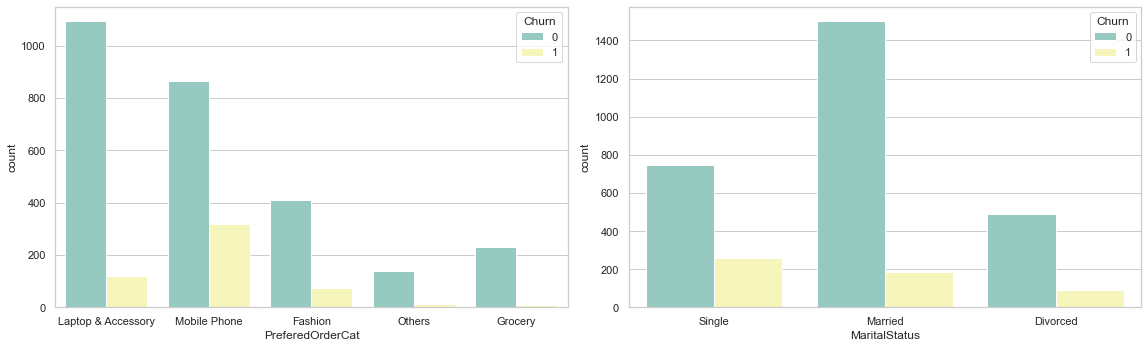

In [238]:
plt.figure(figsize=(40,5))

for col in range(len(data_cat)):

    plt.subplot(1,5, col+1)
    sns.countplot(data=df, x=data_cat[col], hue='Churn')

plt.tight_layout()

In [239]:
df.groupby(['PreferedOrderCat', 'MaritalStatus'])[['Churn']].count().sort_values('Churn',ascending=False)

Churn
PreferedOrderCat   MaritalStatus       
Laptop & Accessory Married          657
Mobile Phone       Married          547
                   Single           430
Laptop & Accessory Single           352
Fashion            Married          267
Mobile Phone       Divorced         206
Laptop & Accessory Divorced         204
Fashion            Single           133
Grocery            Married          129
Others             Married           86
Fashion            Divorced          84
Grocery            Single            61
                   Divorced          51
Others             Single            32
                   Divorced          31

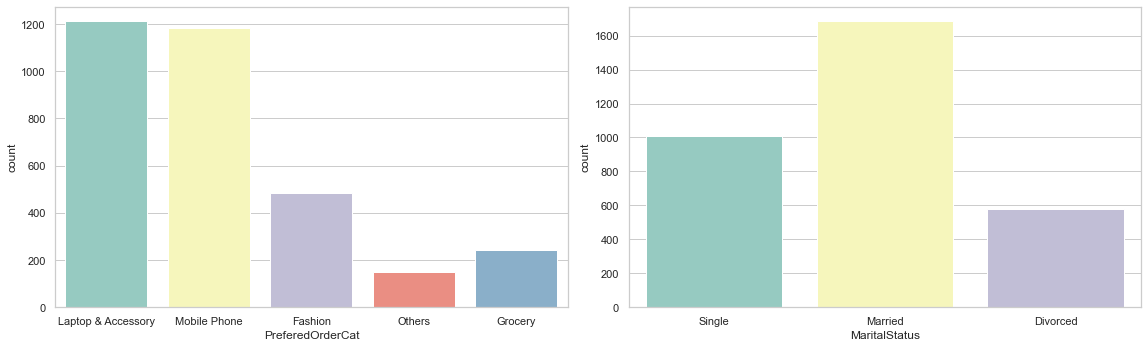

In [240]:
plt.figure(figsize=(40,5))

for col in range(len(data_cat)):

    plt.subplot(1,5, col+1)
    sns.countplot(data=df, x=data_cat[col])

plt.tight_layout()

In [241]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                241
Others                 149
Name: PreferedOrderCat, dtype: int64

#### Hasil:
---
    Melalui pemahaman analisa diatas, ditemukan beberapa pemahaman data, yaitu:
    1. Kategori Laptop & Accessory, Mobile Phone, dan Fashion merupakan kategori yang memiliki jumlah pelanggan tetap terbanyak.
    2. Pelanggan E-Commerce yang sudah menikah lebih banyak dari pada pelanggan single ataupun cerai.
    3. E-Commerce ini memiliki 5 Kategori, yaitu Laptop & Accessory, Mobile Phone, Fashion, Grocery, dan lain-lain.
---

### Retention Rate & Churn Rate
    Melakukan perhitungan Retention Rate dan Churn Rate. Karena, Retention Rate merupakan  persentase pelanggan yang selalu menggunakan layanan kita dan dapat mempengaruhi bisnis yang sedang berjalan. Sementara, Churn Rate adalah persentase pelanggan yang hilang.

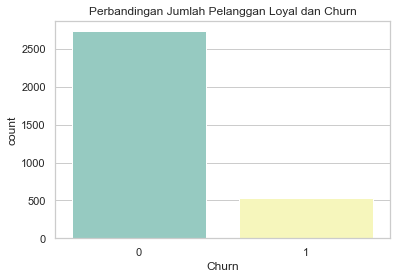

In [242]:
plt.title('Perbandingan Jumlah Pelanggan Loyal dan Churn')
sns.countplot(data=df, x=df['Churn']);

In [243]:
# Menampilkan jumlah pelanggan secara keseluruhan
df['Churn'].value_counts().sum()

3270

In [244]:
# Menampilkan jumlah dari Pelanggan Loyal dan Pelanggan Churn
df['Churn'].value_counts()

0    2736
1     534
Name: Churn, dtype: int64

In [245]:
# Baris code ini, berfungsi untuk menghitung Retention Rate
retentionRate = ((df['Churn'].value_counts()[0] / len(df)) * 100).round()
retentionRate

84.0

In [246]:
# Baris code ini, berfungsi untuk menghitung Churn Rate
churnRate = ((df['Churn'].value_counts()[1] / len(df)) * 100).round()
churnRate

16.0

#### Hasil:
---
    Berdasarkan hasil analisa diatas, ditemukan dataset ini Imbalance. Jumlah pelanggan loyal yaitu 2736 orang, sementara pelanggan yang terdeteksi berhenti menggunakan E-Commerce yaitu 534. Dari hasil tersebut, ditemukan retention rate dan churn rate dengan perhitungan:

    Retention Rate = (Jumlah pelanggan saat ini / Pelanggan pada awal periode) x 100
                   = (2736 / 3270) x 100
                   = 84%
    
    Churn Rate     = (Jumlah pelanggan berhenti / Pelanggan pada awal periode) x 100
                   = (534 / 3270) x 100
                   = 16%
---

### Analisa Umum
    Melakukan analisa data, untuk mencari pengetahuan bisnis yang umum.

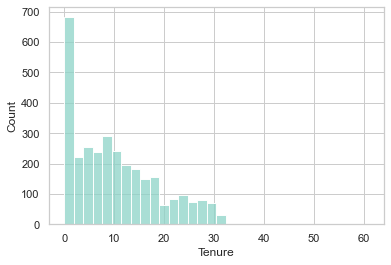

In [247]:
# Pemeriksaan Distribusi Data
sns.histplot(data=df, x='Tenure');

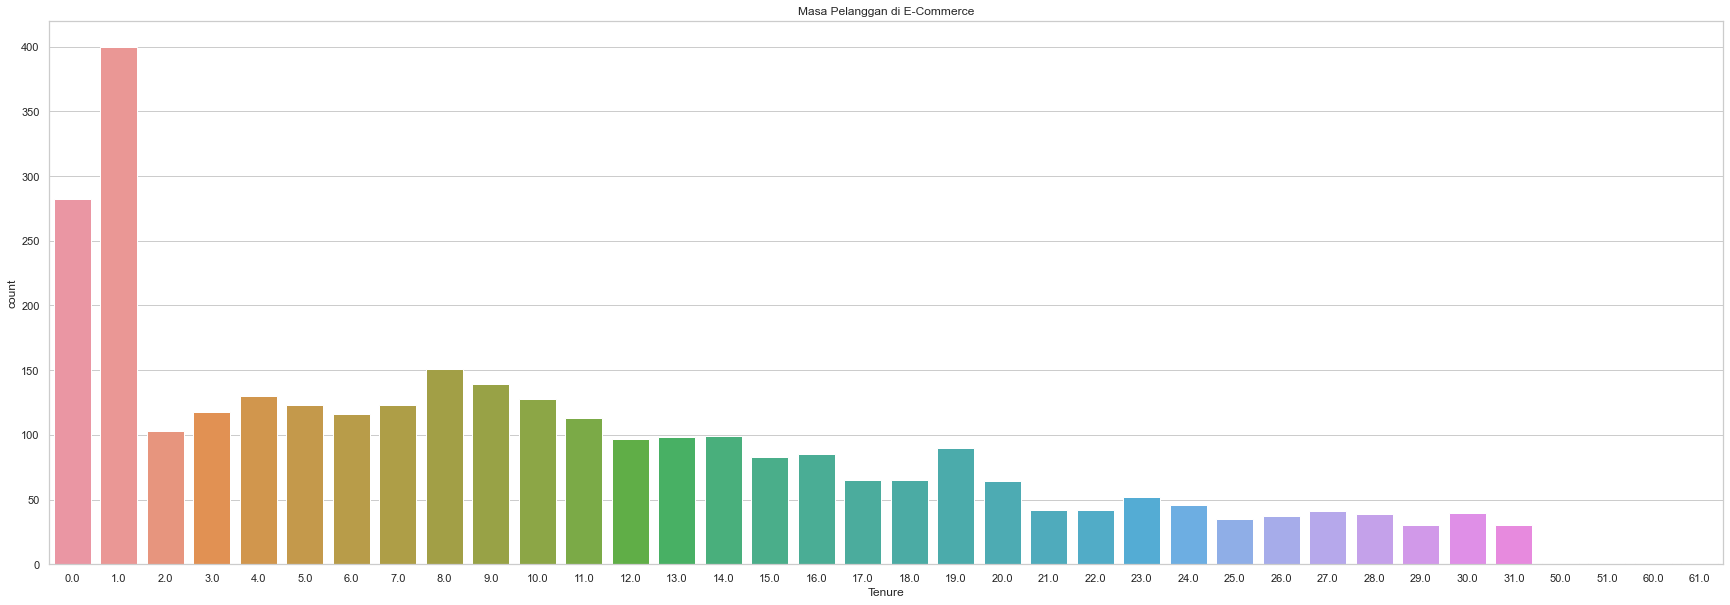

In [248]:
# Baris code ini menampilkan masa pelanggan pada E-Commerce
plt.figure(figsize=(30,10))
plt.title('Masa Pelanggan di E-Commerce')
sns.countplot(data=df, x=df['Tenure']);

In [249]:
df['Tenure'].value_counts()

1.0     400
0.0     282
8.0     151
9.0     139
4.0     130
10.0    128
5.0     123
7.0     123
3.0     118
6.0     116
11.0    113
2.0     103
14.0     99
13.0     98
12.0     97
19.0     90
16.0     85
15.0     83
18.0     65
17.0     65
20.0     64
23.0     52
24.0     46
22.0     42
21.0     42
27.0     41
30.0     40
28.0     39
26.0     37
25.0     35
29.0     30
31.0     30
61.0      1
51.0      1
60.0      1
50.0      1
Name: Tenure, dtype: int64

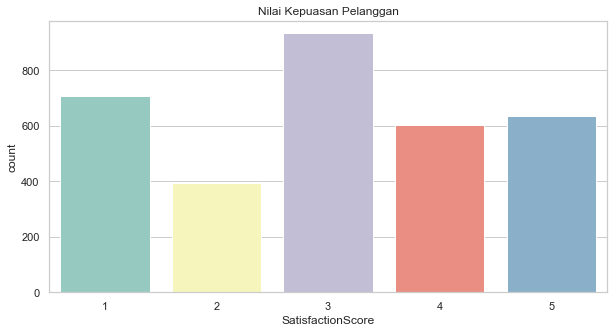

In [250]:
# Baris code ini menampilkan masa pelanggan pada E-Commerce
plt.figure(figsize=(10,5))
plt.title('Nilai Kepuasan Pelanggan')
sns.countplot(data=df, x=df['SatisfactionScore']);

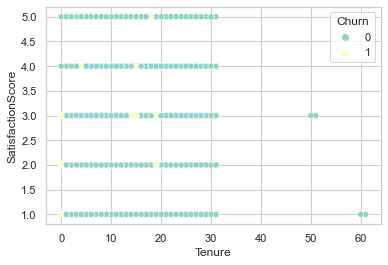

In [251]:
# korelasi antara Masa Pelanggan di E-Commerce dan Nilai Kepuasan
sns.scatterplot(x='Tenure', y='SatisfactionScore', hue='Churn', data=df);

In [252]:
df['SatisfactionScore'].value_counts()

3    932
1    707
5    635
4    604
2    392
Name: SatisfactionScore, dtype: int64

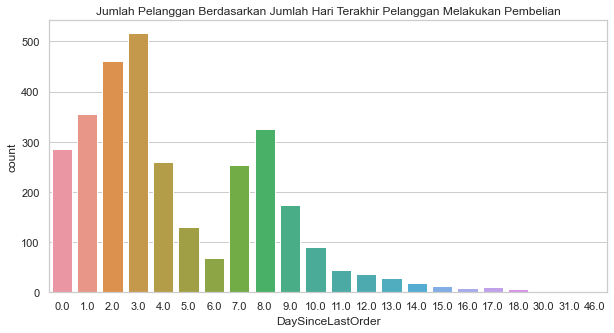

In [253]:
# Baris code ini menampilkan jumlah pelanggan berdasarkan jumlah hari terakhir pelanggan melakukan pembelian
plt.figure(figsize=(10,5))
plt.title('Jumlah Pelanggan Berdasarkan Jumlah Hari Terakhir Pelanggan Melakukan Pembelian')
sns.countplot(data=df, x=df['DaySinceLastOrder']);

In [254]:
# Jumlah Pelanggan Berdasarkan Hari
df['DaySinceLastOrder'].value_counts()

3.0     516
2.0     461
1.0     356
8.0     326
0.0     286
4.0     260
7.0     253
9.0     173
5.0     131
10.0     91
6.0      68
11.0     45
12.0     36
13.0     29
14.0     18
15.0     12
17.0     11
16.0      8
18.0      6
30.0      1
46.0      1
31.0      1
Name: DaySinceLastOrder, dtype: int64

#### Hasil:
---
    Berdasarkan pemahaman analisa di atas, ditemukan:
    1. Data tidak terdistribusi normal
    2. Lebih banyak pelanggan baru pada E-Commerce Lakü
    3. Nilai kepuasan E-Commerce lebih banyak yang normal/biasa saja
    4. Jumlah Pelanggan yang melakukan pembelian < 10 Hari masih cukup banyak
---

### HASIL PROSES ANALISA DATA
--- 
    Dari melakukan proses analisa data, data scientist mendapatkan beberapa pengetahuan, yaitu:
    1. E-Commerce Lakü memiliki 5 Kategori, yaitu:
        - Laptop & Accessory
        - Mobile Phone
        - Fashion
        - Grocery
        - Other
       Kategori dengan pelanggan terbanyak adalah gadget / laptop,handphone, dan aksesorisnya
    2. E-Commerce Lakü memiliki pelanggan yang lebih banyak dengan status berkeluarga / menikah.
    3. Tingkat Retensi E-Commerce Lakü tergolong cukup yaitu 84%, dimana layanan IT yang baik biasanya memiliki 81%.
    4. E-Commerce Lakü memiliki lebih banyak pelanggan baru, dengan rentang waktu 0 hari - 1 bulan.
    5. E-Commerce Lakü memiliki tingkat kepuasan yang tergolong rata-rata, masih banyak pelanggan yang kurang puas dengan Lakü. 
    6. Pembelian di Lakü masih tergolong baik, karena pelanggan dengan masa pembelian terakhir masih berada dirata-rata 2/3 hari.
---
Sumber:

https://majoo.id/solusi/detail/retention-rate-adalah

## **4. Define Feature and Target**
---
    Data Scientist memilih data yang ingin dilatih dan target prediksinya.

In [255]:
# Code untuk memilih data yang dilatih
X = df.drop(columns='Churn')

# Code untuk memilih target yang di prediksi
y = df['Churn']

In [256]:
df.head(3)

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0


### HASIL DEFINE FEATURE DAN TARGET:
---
    Data Scientist memilih untuk menggunakan kolom yang ingin dilatih, yaitu:
    1. Tenure
    2. WarehouseToHome
    3. NumberOfDeviceRegistered
    4. PreferedOrderCat
    5. SatisfactionScore
    6. MaritalStatus
    7. NumberOfAddress
    8. Complain
    9. DaySinceLastOrder
    10. CashbackAmount

    Sementara target yang ingin diprediksi adalah Churn
---

## **5. Data Splitting**
---
    Data Scientist melakukan pembagian data menjadi 2 bagian, yaitu untuk melakukan pengujian data dan melatih model.

In [257]:
# Code untuk melakukan Data split, yang membagi menjadi 4 yaitu 2 future test dan train, 2 target test dan train.

X_train, X_test, y_train, y_test = train_test_split(
    X,                  # feature
    y,                  # target
    test_size=0.2,      # jumlah test set 20%
    random_state=0,     # mengunci randomize
    stratify=y          # proporsi y di train set dan test set sama dengan proporsi y di dataset awal
)

### HASIL DATA SPLITTING:
---
    Proses data splitting, yaitu membagi data menjadi 2 bagian untuk melakukan pengujian dan pelatihan model. Data scientist menggunakan fungsi dari library scikit-library untuk membagi data menjadi 2 bagian.
    Dalam kasus ini, data scientist mengalokasikan 20% data untuk dilakukan pengujian dan 80% sisanya untuk dilakukan pelatihan model. Model yang dilatih akan disimpan pada variabel X dan targetnya pada variabel y.
    
    Hasil akhir akan memunculkan:
    - X_train: Feature untuk dilakukan pelatihan model
    - X_test : Feature untuk dilakukan pengujian model
    - y_train: Target untuk dilakukan pelatihan model
    - y_test : Target untuk dilakukan pengujian model
---

## **6. Pre-Processing**
---
    Pada proses ini data scientist akan melakukan: 
1. Impute Missing Value, untuk kolom:
    - Tenure
    - WarehouseToHome
    - DaySinceLastOrder
<br><br>
2. Encode:
    - OneHot Encoder:
        - PreferedOrderCat
        - MaritalStatus
<br><br>
3. Scaling:
    - MinMaxScaler
    - RobustScaler:
        - Tenure, WarehouseToHome, NumberOfDeviceRegistered, SatisfactionScore, NumberOfAddress, DaySinceLastOrder, CashbackAmount
    - StandardScaler
<br><br>
4. Passthrough:
    - Complain

In [258]:
# Menampilkan data feature/ data yang ingin dilatih
X.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17


In [259]:
# Iterative imputer & RobustScaler
pipe_iter_robust = Pipeline([
    ('imp_iter', IterativeImputer()),       # Mengisi nilai yang kosong 
    ('scaling', RobustScaler())             # Menyamakan format data
])

# Transformasi Data --> Menyamakan format data
transformer = ColumnTransformer([
    # Mendefinisikan kolom yang akan dilakukan pengisian nilai kosong
    ('imp_iter', pipe_iter_robust, ['NumberOfDeviceRegistered','SatisfactionScore','NumberOfAddress','CashbackAmount','Tenure','WarehouseToHome','DaySinceLastOrder']),
    # Mengubah kolom kategorikan untuk dijadikan numerikal   
    ('encoder', OneHotEncoder(), ['PreferedOrderCat','MaritalStatus']),
], remainder='passthrough')

### HASIL DATA PRE-PROCESSING:
---
    Data Pre-Processing perlu dilakukan untuk mengubah format data yang mentah menjadi data berformat yang dipahami oleh algoritma machine learning, sehingga dapat mengeluarkan hasil yang lebih akurat.
    Pre-Processing sendiri melibatkan proses untuk menghilangkan permasalahan yang bisa menggangu saat pemrosesan data, hal tersebut bisa terjadi karena banyak data yang memiliki format tidak konsisten.

    Dalam kasus ini Data Scientist melakukan data cleaning, yaitu mengisi data yang kosong dengan imputer. Lalu melakukan Scaling dan Transformasi data karena data memiliki perbedaan format. 
---

## **7. Cross Validation**
---
    Data Scientist melakukan metode cross validation ini bertujuan untuk memperoleh hasil maksimal. Proses ini dilakukan untuk mengetahui performa dari suatu algoritma model.

### Define Algorithm
---
Menyimpan 10 algoritma untuk dilakukan pengujian mana yang terbaik untuk digunakan menjadi suatu model.

In [260]:
# Menyimpan algoritma LogisticRegression
logReg = LogisticRegression(random_state=0, class_weight='balanced')

# Menyimpan algoritma KNeighborsClassifier
KNeighbors = KNeighborsClassifier()

# Menyimpan algoritma DecisionTreeClassifier
decTree = DecisionTreeClassifier(random_state=0, class_weight='balanced')

# Menyimpan algoritma RandomForestClassifier
ranForest = RandomForestClassifier(random_state=0, class_weight='balanced')

# Menyimpan algoritma AdaBoostClassifier
adaBoost = AdaBoostClassifier(random_state=0)

# Menyimpan algoritma GradientBoostingClassifier
gradBoost = GradientBoostingClassifier(random_state=0)

# Menyimpan algoritma XGBClassifier
xgBoost = XGBClassifier()

# menyimpan algoritma Voting (ensemble)
voting = VotingClassifier([
    ('clf1', logReg),
    ('clf2', KNeighbors),
    ('clf3', decTree)
]) 

# menyimpan algoritma Stacking (ensemble)
stacking = StackingClassifier(
    estimators=[
        ('clf1', logReg),
        ('clf2', KNeighbors),
        ('clf3', decTree)
        ],
    final_estimator= logReg
)

# menyimpan algoritma LGBMClassifier
lgbm = LGBMClassifier(random_state=0, class_weight='balanced')

In [261]:
# Menggunakan scoring F2
f2 = make_scorer(fbeta_score, beta=2)

In [263]:
# List algoritma yang digunakan
list_algo = [logReg, KNeighbors, decTree, ranForest, adaBoost, gradBoost, xgBoost, voting, stacking, lgbm]
algo_name = ['LogisticRegression', 'KNeighborsClassifier', 'DecisionTreeClassifier', 'RandomForestClassifier', 'AdaBoostClassifier', 'GradientBoostingClassifier', 'XGBClassifier', 'VotingClassifier', 'StackingClassifier', 'LGBMClassifier']
# List scoring yang digunakan
list_scoring = ['recall','precision','f1', f2]
list_score = []

# List kosong
list_all_score = []
list_mean = []
list_std = []
list_algo_name = []
list_score_name = [] 

# Looping / Perulangan
for model in range(len(list_algo)):
    for score in list_scoring:
        # pipeline yg menggabungkan preprocessing dan modeling 
        # (agar tidak terjadi information leakage)
        pipe_model = Pipeline([
            ('preprocessing', transformer),
            ('modeling', list_algo[model])
        ])

        # cross validation
        cv_score = cross_val_score( 
            estimator= pipe_model,  # model
            X = X_train,            # X_train
            y = y_train,            # y_train
            cv = 5,                 # berapa fold
            scoring= score          # metric
        ) 

        # Memasukan hasil kedalam list
        list_all_score.append(cv_score.round(3))
        list_mean.append(cv_score.mean().round(3))
        list_std.append(cv_score.std().round(3))
        list_algo_name.append(algo_name[model])
        list_score_name.append(score) 

In [282]:
# Membuat Dataframe
df_cv = pd.DataFrame({
    'algo': list_algo_name,             # Menampilkan nama algoritma
    'scoring': list_score_name,         # Menampilkan jenis scoring
    'mean': list_mean,                  # Nilai rata-rata CV Score
    'std': list_std,                    
    'all': list_all_score
})
display(
    df_cv[df_cv['scoring']=='precision'].sort_values('mean', ascending=False),  # Menampilkan algo dengan score precison
    df_cv[df_cv['scoring']=='recall'].sort_values('mean', ascending=False),     # Menampilkan algo dengan score recall
    df_cv[df_cv['scoring']=='f1'].sort_values('mean', ascending=False),         # Menampilkan algo dengan score f1
    df_cv[df_cv['scoring']== f2].sort_values('mean', ascending=False)           # Menampilkan algo dengan score f2
)

,algo,scoring,mean,std,all
13,RandomForestClassifier,precision,0.832,0.055,"[0.855, 0.754, 0.833, 0.8, 0.92]"
25,XGBClassifier,precision,0.788,0.016,"[0.81, 0.771, 0.803, 0.782, 0.773]"
21,GradientBoostingClassifier,precision,0.782,0.035,"[0.79, 0.743, 0.845, 0.765, 0.768]"
17,AdaBoostClassifier,precision,0.737,0.032,"[0.746, 0.677, 0.763, 0.731, 0.767]"
37,LGBMClassifier,precision,0.700,0.026,"[0.692, 0.663, 0.727, 0.684, 0.731]"
5,KNeighborsClassifier,precision,0.696,0.049,"[0.721, 0.625, 0.688, 0.674, 0.773]"
29,VotingClassifier,precision,0.674,0.052,"[0.701, 0.588, 0.691, 0.648, 0.74]"
9,DecisionTreeClassifier,precision,0.647,0.034,"[0.635, 0.584, 0.676, 0.667, 0.671]"
33,StackingClassifier,precision,0.516,0.012,"[0.535, 0.504, 0.512, 0.504, 0.526]"
1,LogisticRegression,precision,0.442,0.018,"[0.438, 0.437, 0.452, 0.415, 0.469]"


,algo,scoring,mean,std,all
0,LogisticRegression,recall,0.836,0.054,"[0.907, 0.776, 0.776, 0.835, 0.884]"
32,StackingClassifier,recall,0.819,0.045,"[0.884, 0.788, 0.753, 0.835, 0.837]"
36,LGBMClassifier,recall,0.791,0.037,"[0.86, 0.788, 0.753, 0.765, 0.791]"
24,XGBClassifier,recall,0.663,0.058,"[0.744, 0.635, 0.624, 0.718, 0.593]"
28,VotingClassifier,recall,0.630,0.056,"[0.709, 0.588, 0.553, 0.671, 0.628]"
8,DecisionTreeClassifier,recall,0.611,0.072,"[0.709, 0.529, 0.588, 0.682, 0.547]"
20,GradientBoostingClassifier,recall,0.574,0.041,"[0.57, 0.612, 0.576, 0.612, 0.5]"
12,RandomForestClassifier,recall,0.564,0.031,"[0.616, 0.576, 0.529, 0.565, 0.535]"
16,AdaBoostClassifier,recall,0.555,0.037,"[0.616, 0.518, 0.529, 0.576, 0.535]"
4,KNeighborsClassifier,recall,0.342,0.045,"[0.36, 0.353, 0.259, 0.341, 0.395]"


,algo,scoring,mean,std,all
38,LGBMClassifier,f1,0.742,0.019,"[0.767, 0.72, 0.74, 0.722, 0.76]"
26,XGBClassifier,f1,0.719,0.038,"[0.776, 0.697, 0.702, 0.748, 0.671]"
14,RandomForestClassifier,f1,0.671,0.025,"[0.716, 0.653, 0.647, 0.662, 0.676]"
22,GradientBoostingClassifier,f1,0.661,0.029,"[0.662, 0.671, 0.685, 0.68, 0.606]"
30,VotingClassifier,f1,0.649,0.043,"[0.705, 0.588, 0.614, 0.659, 0.679]"
34,StackingClassifier,f1,0.633,0.021,"[0.667, 0.615, 0.61, 0.628, 0.646]"
18,AdaBoostClassifier,f1,0.632,0.029,"[0.675, 0.587, 0.625, 0.645, 0.63]"
10,DecisionTreeClassifier,f1,0.626,0.044,"[0.67, 0.556, 0.629, 0.674, 0.603]"
2,LogisticRegression,f1,0.578,0.022,"[0.591, 0.559, 0.571, 0.555, 0.613]"
6,KNeighborsClassifier,f1,0.457,0.048,"[0.481, 0.451, 0.376, 0.453, 0.523]"


,algo,scoring,mean,std,all
39,LGBMClassifier,"make_scorer(fbeta_score, beta=2)",0.771,0.027,"[0.82, 0.76, 0.748, 0.747, 0.778]"
35,StackingClassifier,"make_scorer(fbeta_score, beta=2)",0.733,0.032,"[0.782, 0.708, 0.688, 0.738, 0.748]"
3,LogisticRegression,"make_scorer(fbeta_score, beta=2)",0.709,0.034,"[0.747, 0.672, 0.679, 0.695, 0.751]"
27,XGBClassifier,"make_scorer(fbeta_score, beta=2)",0.684,0.051,"[0.757, 0.659, 0.653, 0.73, 0.622]"
31,VotingClassifier,"make_scorer(fbeta_score, beta=2)",0.637,0.049,"[0.708, 0.588, 0.576, 0.666, 0.647]"
11,DecisionTreeClassifier,"make_scorer(fbeta_score, beta=2)",0.617,0.060,"[0.693, 0.54, 0.604, 0.679, 0.568]"
23,GradientBoostingClassifier,"make_scorer(fbeta_score, beta=2)",0.606,0.036,"[0.603, 0.634, 0.616, 0.637, 0.538]"
15,RandomForestClassifier,"make_scorer(fbeta_score, beta=2)",0.602,0.028,"[0.653, 0.605, 0.571, 0.6, 0.584]"
19,AdaBoostClassifier,"make_scorer(fbeta_score, beta=2)",0.583,0.033,"[0.639, 0.543, 0.564, 0.602, 0.569]"
7,KNeighborsClassifier,"make_scorer(fbeta_score, beta=2)",0.380,0.047,"[0.401, 0.387, 0.296, 0.379, 0.438]"


    Proses Cross Validation ini, menguji 10 algoritma yang digunakan untuk dikombinasikan pada tiap scoring yang berbeda. Saat ini kita menggunakan scoring precision, recall, f1, dan f2. Namun kita hanya akan menggunakan scoring F2 karena permasalahan yang kita simpulkan diatas, beban perusahaan ini berada pada nilai FN. Sementara untuk menjaga FP tidak terlalu tinggi. Maka kita akan memperhatikan keduanya, namun titik fokus lebih berat kepada nilai FN

## **8. Hyperparameter Tuning**
---

### 8.1 LGBM Classifier

#### 8.1.1 Randomized Search LGBM Classifier (1)

In [ ]:
# Parameter untuk RandomizedSearch
hyperparam = {
    'modeling__n_estimators': [100, 200, 300, 400, 500],
    'modeling__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'modeling__learning_rate': np.arange(0.01, 0.5, 0.05),
    'modeling__num_leaves': [4, 8, 16, 32, 64, 128, 256, 512],
    'modeling__boosting_type': ['gbdt', 'dart'],
    'preprocessing__encoder': [OneHotEncoder(), BinaryEncoder()],
    'preprocessing__imp_iter__scaling': [RobustScaler(), MinMaxScaler(), StandardScaler()],
    'preprocessing__imp_iter__imp_iter':[IterativeImputer(random_state=0), SimpleImputer(strategy='median'), SimpleImputer(strategy='mean'), KNNImputer()],
    'resampler': [None, RandomOverSampler(random_state=0), RandomUnderSampler(random_state=0), NearMiss(), SMOTE(random_state=0)]
}           

# untuk estimator
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('resampler', None),
        ('modeling', lgbm)
    ])

In [ ]:
randomSearch_lgbm = RandomizedSearchCV(
    estimator= pipe_model,
    param_distributions= hyperparam,
    cv=5,                           # Jumlah Fold
    scoring=f2,                     # Scoring yang digunakan
    n_jobs=-1,                      # Memaksimalkan kerja CPU
    random_state= 0,
    n_iter= 20000                 # jumlah kombinasi hyperparameter yang akan difitting
) 

In [ ]:
randomSearch_lgbm.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('imp_iter',
                                                                               Pipeline(steps=[('imp_iter',
                                                                                                IterativeImputer()),
                                                                                               ('scaling',
                                                                                                RobustScaler())]),
                                                                               ['NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'CashbackAmount',
                                                                                'Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('enco...
                                        'preprocessing__imp_iter__imp_iter': [IterativeImputer(random_state=0),
                                                                              SimpleImputer(strategy='median'),
                                                                              SimpleImputer(),
                                                                              KNNImputer()],
                                        'preprocessing__imp_iter__scaling': [RobustScaler(),
                                                                             MinMaxScaler(),
                                                                             StandardScaler()],
                                        'resampler': [None,
                                                      RandomOverSampler(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      NearMiss(),
                                                      SMOTE(random_state=0)]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
# score terbaik menggunakan Randomized Search 
score_random_lgbm1 = randomSearch_lgbm.best_score_.round(3)
score_random_lgbm1

0.794

In [ ]:
# Parameter terbaik
param_random_lgbm1 = randomSearch_lgbm.best_params_
param_random_lgbm1

{'resampler': None,
 'preprocessing__imp_iter__scaling': StandardScaler(),
 'preprocessing__imp_iter__imp_iter': KNNImputer(),
 'preprocessing__encoder': OneHotEncoder(),
 'modeling__num_leaves': 32,
 'modeling__n_estimators': 200,
 'modeling__max_depth': 6,
 'modeling__learning_rate': 0.060000000000000005,
 'modeling__boosting_type': 'gbdt'}

In [ ]:
pd.set_option('display.max_columns', None)
# score MAE pada tiap kombinasi hyperparameter
cv_output1 = pd.DataFrame(randomSearch_lgbm.cv_results_).sort_values('mean_test_score', ascending=False)
cv_output1.to_csv('output_random_lgbm.csv')
cv_output1.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_preprocessing__imp_iter__scaling,param_preprocessing__imp_iter__imp_iter,param_preprocessing__encoder,param_modeling__num_leaves,param_modeling__n_estimators,param_modeling__max_depth,param_modeling__learning_rate,param_modeling__boosting_type,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7738,0.238652,0.014573,0.032607,0.001625,None,StandardScaler(),KNNImputer(),OneHotEncoder(),32,200,6,0.06,gbdt,"{'resampler': None, 'preprocessing__imp_iter__scaling': StandardScaler(), 'preprocessing__imp_iter__imp_iter': KNNImputer(), 'preprocessing__encoder': OneHotEncoder(), 'modeling__num_leaves': 32, 'modeling__n_estimators': 200, 'modeling__max_depth': 6, 'modeling__learning_rate': 0.060000000000000005, 'modeling__boosting_type': 'gbdt'}",0.816555,0.812641,0.769231,0.766590,0.802752,0.793554,0.021432,1
7325,1.851681,0.097393,0.162439,0.079533,RandomOverSampler(random_state=0),StandardScaler(),IterativeImputer(random_state=0),BinaryEncoder(),128,500,9,0.01,gbdt,"{'resampler': RandomOverSampler(random_state=0), 'preprocessing__imp_iter__scaling': StandardScaler(), 'preprocessing__imp_iter__imp_iter': IterativeImputer(random_state=0), 'preprocessing__encoder': BinaryEncoder(), 'modeling__num_leaves': 128, 'modeling__n_estimators': 500, 'modeling__max_depth': 9, 'modeling__learning_rate': 0.01, 'modeling__boosting_type': 'gbdt'}",0.840708,0.772727,0.771028,0.783410,0.790698,0.791714,0.025530,2
17188,1.290489,0.063661,0.043811,0.003711,None,StandardScaler(),KNNImputer(),OneHotEncoder(),8,500,5,0.26,dart,"{'resampler': None, 'preprocessing__imp_iter__scaling': StandardScaler(), 'preprocessing__imp_iter__imp_iter': KNNImputer(), 'preprocessing__encoder': OneHotEncoder(), 'modeling__num_leaves': 8, 'modeling__n_estimators': 500, 'modeling__max_depth': 5, 'modeling__learning_rate': 0.26, 'modeling__boosting_type': 'dart'}",0.835165,0.784753,0.770115,0.758929,0.808989,0.791590,0.027482,3


In [ ]:
# best model
randomSearch_lgbm_tuning = randomSearch_lgbm.best_estimator_
randomSearch_lgbm_tuning

# fit
randomSearch_lgbm_tuning.fit(X, y)

# save with pickle
pickle.dump(randomSearch_lgbm_tuning, open('model_lgbm_20000.sav', 'wb'))

#### 8.1.2 Randomized Search LGBM Classifier (2)

In [ ]:
# Parameter untuk Randomized Search
hyperparam2 = {
    'modeling__n_estimators': [100, 200, 300, 400, 500],
    'modeling__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'modeling__learning_rate': np.arange(0.01, 0.5, 0.05),
    'modeling__num_leaves': [4, 8, 16, 32, 64, 128, 256, 512],
    'modeling__boosting_type': ['gbdt', 'dart'],
    'preprocessing__encoder': [OneHotEncoder(), BinaryEncoder()],
    'preprocessing__imp_iter__scaling': [RobustScaler(), MinMaxScaler(), StandardScaler()],
    'preprocessing__imp_iter__imp_iter':[IterativeImputer(random_state=0), SimpleImputer(strategy='median'), SimpleImputer(strategy='mean'), KNNImputer()],
    'resampler': [None, RandomOverSampler(random_state=0), RandomUnderSampler(random_state=0), NearMiss(), SMOTE(random_state=0)]
}           

# untuk estimator
pipe_model2 = Pipeline([
        ('preprocessing', transformer),
        ('resampler', None),
        ('modeling', lgbm)
    ])

In [ ]:
randomSearch_lgbm2 = RandomizedSearchCV(
    estimator= pipe_model2,
    param_distributions= hyperparam2,
    cv=5,
    scoring=f2,                     # Scoring yang digunakan
    n_jobs=-1,                      # Memaksimalkan kerja CPU
    random_state= 0,
    n_iter= 10000                 # jumlah kombinasi hyperparameter yang akan difitting
) 

In [ ]:
randomSearch_lgbm2.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('imp_iter',
                                                                               Pipeline(steps=[('imp_iter',
                                                                                                IterativeImputer()),
                                                                                               ('scaling',
                                                                                                RobustScaler())]),
                                                                               ['NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'CashbackAmount',
                                                                                'Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('enco...
                                        'preprocessing__imp_iter__imp_iter': [IterativeImputer(random_state=0),
                                                                              SimpleImputer(strategy='median'),
                                                                              SimpleImputer(),
                                                                              KNNImputer()],
                                        'preprocessing__imp_iter__scaling': [RobustScaler(),
                                                                             MinMaxScaler(),
                                                                             StandardScaler()],
                                        'resampler': [None,
                                                      RandomOverSampler(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      NearMiss(),
                                                      SMOTE(random_state=0)]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
# Score terbaik hasil RandomizedSearch
score_random_lgbm2 = randomSearch_lgbm2.best_score_.round(3)
score_random_lgbm2

0.794

In [ ]:
# Parameter Terbaik
param_random_lgbm2 = randomSearch_lgbm2.best_params_
param_random_lgbm2

{'resampler': None,
 'preprocessing__imp_iter__scaling': StandardScaler(),
 'preprocessing__imp_iter__imp_iter': KNNImputer(),
 'preprocessing__encoder': OneHotEncoder(),
 'modeling__num_leaves': 32,
 'modeling__n_estimators': 200,
 'modeling__max_depth': 6,
 'modeling__learning_rate': 0.060000000000000005,
 'modeling__boosting_type': 'gbdt'}

In [ ]:
pd.set_option('display.max_columns', None)
# score MAE pada tiap kombinasi hyperparameter
cv_output2 = pd.DataFrame(randomSearch_lgbm2.cv_results_).sort_values('mean_test_score', ascending=False)
cv_output2.to_csv('output_random_lgbm_10000.csv')
cv_output2.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_preprocessing__imp_iter__scaling,param_preprocessing__imp_iter__imp_iter,param_preprocessing__encoder,param_modeling__num_leaves,param_modeling__n_estimators,param_modeling__max_depth,param_modeling__learning_rate,param_modeling__boosting_type,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
7738,0.269060,0.030384,0.035410,0.003932,None,StandardScaler(),KNNImputer(),OneHotEncoder(),32,200,6,0.06,gbdt,"{'resampler': None, 'preprocessing__imp_iter__scaling': StandardScaler(), 'preprocessing__imp_iter__imp_iter': KNNImputer(), 'preprocessing__encoder': OneHotEncoder(), 'modeling__num_leaves': 32, 'modeling__n_estimators': 200, 'modeling__max_depth': 6, 'modeling__learning_rate': 0.060000000000000005, 'modeling__boosting_type': 'gbdt'}",0.816555,0.812641,0.769231,0.76659,0.802752,0.793554,0.021432,1
7325,2.105874,0.056358,0.169844,0.066219,RandomOverSampler(random_state=0),StandardScaler(),IterativeImputer(random_state=0),BinaryEncoder(),128,500,9,0.01,gbdt,"{'resampler': RandomOverSampler(random_state=0), 'preprocessing__imp_iter__scaling': StandardScaler(), 'preprocessing__imp_iter__imp_iter': IterativeImputer(random_state=0), 'preprocessing__encoder': BinaryEncoder(), 'modeling__num_leaves': 128, 'modeling__n_estimators': 500, 'modeling__max_depth': 9, 'modeling__learning_rate': 0.01, 'modeling__boosting_type': 'gbdt'}",0.840708,0.772727,0.771028,0.78341,0.790698,0.791714,0.025530,2
2914,1.318301,0.079631,0.030807,0.006014,None,RobustScaler(),IterativeImputer(random_state=0),OneHotEncoder(),8,500,9,0.31,dart,"{'resampler': None, 'preprocessing__imp_iter__scaling': RobustScaler(), 'preprocessing__imp_iter__imp_iter': IterativeImputer(random_state=0), 'preprocessing__encoder': OneHotEncoder(), 'modeling__num_leaves': 8, 'modeling__n_estimators': 500, 'modeling__max_depth': 9, 'modeling__learning_rate': 0.31000000000000005, 'modeling__boosting_type': 'dart'}",0.805740,0.778781,0.800464,0.78125,0.788889,0.791025,0.010542,3


In [ ]:
# best model
randomSearch_lgbm_tuning2 = randomSearch_lgbm2.best_estimator_
randomSearch_lgbm_tuning2

# fit
randomSearch_lgbm_tuning2.fit(X, y)

# save with pickle
pickle.dump(randomSearch_lgbm_tuning2, open('model_lgbm_10000.sav', 'wb'))

#### 8.1.3 Randomized Search LGBM Classifier (3)

In [ ]:
# Parameter untuk melakukan Randomized Search
hyperparam3 = {
    'modeling__n_estimators': [100, 200, 300, 400, 500],
    'modeling__max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'modeling__learning_rate': np.arange(0.01, 0.5, 0.05),
    'modeling__num_leaves': [4, 8, 16, 32, 64, 128, 256, 512],
    'modeling__boosting_type': ['gbdt', 'dart'],
    'preprocessing__encoder': [OneHotEncoder(), BinaryEncoder()],
    'preprocessing__imp_iter__scaling': [RobustScaler(), MinMaxScaler(), StandardScaler()],
    'preprocessing__imp_iter__imp_iter':[IterativeImputer(random_state=0), SimpleImputer(strategy='median'), SimpleImputer(strategy='mean'), KNNImputer()],
    'resampler': [None, RandomOverSampler(random_state=0), RandomUnderSampler(random_state=0), NearMiss(), SMOTE(random_state=0)]
}           

# untuk estimator
pipe_model3 = Pipeline([
        ('preprocessing', transformer),
        ('resampler', None),
        ('modeling', lgbm)
    ])

In [ ]:
# Memproses RandomizeSearch
randomSearch_lgbm3 = RandomizedSearchCV(
    estimator= pipe_model2,
    param_distributions= hyperparam2,
    cv=5,
    scoring=f2,
    n_jobs=-1,
    random_state= 0,
    n_iter= 2000                 # jumlah kombinasi hyperparameter yang akan difitting
) 

In [ ]:
randomSearch_lgbm3.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('imp_iter',
                                                                               Pipeline(steps=[('imp_iter',
                                                                                                IterativeImputer()),
                                                                                               ('scaling',
                                                                                                RobustScaler())]),
                                                                               ['NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'CashbackAmount',
                                                                                'Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('enco...
                                        'preprocessing__imp_iter__imp_iter': [IterativeImputer(random_state=0),
                                                                              SimpleImputer(strategy='median'),
                                                                              SimpleImputer(),
                                                                              KNNImputer()],
                                        'preprocessing__imp_iter__scaling': [RobustScaler(),
                                                                             MinMaxScaler(),
                                                                             StandardScaler()],
                                        'resampler': [None,
                                                      RandomOverSampler(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      NearMiss(),
                                                      SMOTE(random_state=0)]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
# Menampilkan score model terbaik
score_random_lgbm3 = randomSearch_lgbm3.best_score_.round(3)
score_random_lgbm3

0.792

In [ ]:
pd.set_option('display.max_columns', None)
# score MAE pada tiap kombinasi hyperparameter
cv_output3 = pd.DataFrame(randomSearch_lgbm3.cv_results_).sort_values('mean_test_score', ascending=False)
cv_output3.to_csv('output_random_lgbm_2000.csv')
cv_output3.head(3)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_resampler,param_preprocessing__imp_iter__scaling,param_preprocessing__imp_iter__imp_iter,param_preprocessing__encoder,param_modeling__num_leaves,param_modeling__n_estimators,param_modeling__max_depth,param_modeling__learning_rate,param_modeling__boosting_type,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
1508,0.748768,0.011276,0.073419,0.024925,None,MinMaxScaler(),KNNImputer(),OneHotEncoder(),8,300,10,0.26,dart,"{'resampler': None, 'preprocessing__imp_iter__scaling': MinMaxScaler(), 'preprocessing__imp_iter__imp_iter': KNNImputer(), 'preprocessing__encoder': OneHotEncoder(), 'modeling__num_leaves': 8, 'modeling__n_estimators': 300, 'modeling__max_depth': 10, 'modeling__learning_rate': 0.26, 'modeling__boosting_type': 'dart'}",0.822368,0.766667,0.790646,0.753880,0.827815,0.792275,0.029330,1
1029,1.035834,0.030933,0.045009,0.012018,None,RobustScaler(),IterativeImputer(random_state=0),OneHotEncoder(),256,300,5,0.21,dart,"{'resampler': None, 'preprocessing__imp_iter__scaling': RobustScaler(), 'preprocessing__imp_iter__imp_iter': IterativeImputer(random_state=0), 'preprocessing__encoder': OneHotEncoder(), 'modeling__num_leaves': 256, 'modeling__n_estimators': 300, 'modeling__max_depth': 5, 'modeling__learning_rate': 0.21000000000000002, 'modeling__boosting_type': 'dart'}",0.818584,0.808656,0.764706,0.754505,0.806818,0.790654,0.025867,2
1418,2.748422,0.131144,0.047812,0.010710,None,RobustScaler(),SimpleImputer(strategy='median'),BinaryEncoder(),512,500,5,0.16,dart,"{'resampler': None, 'preprocessing__imp_iter__scaling': RobustScaler(), 'preprocessing__imp_iter__imp_iter': SimpleImputer(strategy='median'), 'preprocessing__encoder': BinaryEncoder(), 'modeling__num_leaves': 512, 'modeling__n_estimators': 500, 'modeling__max_depth': 5, 'modeling__learning_rate': 0.16000000000000003, 'modeling__boosting_type': 'dart'}",0.797753,0.804989,0.752941,0.772727,0.814480,0.788578,0.022564,3


In [304]:
# best model
randomSearch_lgbm_tuning3 = randomSearch_lgbm3.best_estimator_
randomSearch_lgbm_tuning3

# fit
randomSearch_lgbm_tuning3.fit(X, y)

# save with pickle
pickle.dump(randomSearch_lgbm_tuning3, open('model_lgbm_Final.sav', 'wb'))

#### 8.1.4 Grid Search LGBM Classifier

In [ ]:
hyperparam = {
    'modeling__n_estimators': [200, 400, 600, 800],
    'modeling__max_depth': [6, 7, 8, 9, 10],
    'modeling__learning_rate': np.arange(0.1, 0.5, 0.1),
    'modeling__num_leaves': [32, 64, 128, 256, 512 ],
    'modeling__boosting_type': ['gbdt', 'dart'],
    'preprocessing__encoder': [OneHotEncoder()],
    'preprocessing__imp_iter__scaling': [RobustScaler(), StandardScaler()],
    'preprocessing__imp_iter__imp_iter':[KNNImputer()],
}           

# untuk estimator
pipe_model = Pipeline([
        ('preprocessing', transformer),
        ('resampler', None),
        ('modeling', lgbm)
    ])

In [ ]:
# define gridsearch
gridSearch_lgbm = GridSearchCV(
    estimator= pipe_model,
    param_grid= hyperparam,
    cv = 5,
    scoring= f2,
    n_jobs= -1
)

In [ ]:
gridSearch_lgbm.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imp_iter',
                                                                         Pipeline(steps=[('imp_iter',
                                                                                          IterativeImputer()),
                                                                                         ('scaling',
                                                                                          RobustScaler())]),
                                                                         ['NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'CashbackAmount',
                                                                          'Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        ('encoder',
                                                                         O...
                         'modeling__learning_rate': array([0.1, 0.2, 0.3, 0.4]),
                         'modeling__max_depth': [6, 7, 8, 9, 10],
                         'modeling__n_estimators': [200, 400, 600, 800],
                         'modeling__num_leaves': [32, 64, 128, 256, 512],
                         'preprocessing__encoder': [OneHotEncoder()],
                         'preprocessing__imp_iter__imp_iter': [KNNImputer()],
                         'preprocessing__imp_iter__scaling': [RobustScaler(),
                                                              StandardScaler()]},
             scoring=make_scorer(fbeta_score, beta=2))

In [ ]:
score_grid_lgbm = gridSearch_lgbm.best_score_.round(3)
score_grid_lgbm

0.781

#### 8.1.5 Kesimpulan Hyperparameter LGBM Classifier

In [ ]:
print(df_cv[df_cv['scoring']== f2].iloc[9,2],'Score Benchmark LGBM Classifier (Sebelum Hyperparameter Tuning)')
print(score_random_lgbm1, 'Score Model LGBM Classifier (Setelah Hyperparameter Tuning RandomizedSearch ke - 1, dengan n_iter = 20000)')
print(score_random_lgbm2, 'Score Model LGBM Classifier (Setelah Hyperparameter Tuning RandomizedSearch ke - 2, dengan n_iter = 10000)')
print(score_random_lgbm3, 'Score Model LGBM Classifier (Setelah Hyperparameter Tuning RandomizedSearch ke - 3, dengan n_iter = 2000)')
print(score_grid_lgbm, 'Score Model LGBM Classifier (Sesudah Hyperparameter Tuning GridSearch)')

0.771 Score Benchmark LGBM Classifier (Sebelum Hyperparameter Tuning)
0.794 Score Model LGBM Classifier (Setelah Hyperparameter Tuning RandomizedSearch ke - 1, dengan n_iter = 20000)
0.794 Score Model LGBM Classifier (Setelah Hyperparameter Tuning RandomizedSearch ke - 2, dengan n_iter = 10000)
0.792 Score Model LGBM Classifier (Setelah Hyperparameter Tuning RandomizedSearch ke - 3, dengan n_iter = 2000)
0.781 Score Model LGBM Classifier (Sesudah Hyperparameter Tuning GridSearch)


#### Hasil Hyperparameter Tuning LGBM Classifier:
---
    Pada proses ini data scientist melakukan proses hyperparameter tuning untuk model terpilih yaitu LGBM Classifier. Model ini akan di hyperparameter tuning menggunakan metode RandomizedSearch dan GridSearch. Dilakukan 3x percobaan tuning RandomizedSearch menggunakan n_iter / percobaan kombinasi sebanyak 20000, 10000, dan 2000. Melalui Randomized menghasilkan score 79,4% dan 79,2% hasil tersebut meningkat dari model standart yang berscore 77,1%. Sementara parameter hasil dari RandomizedSearch dilakukan tuning menggunakan GridSearch untuk mencari yang terbaik, namun ternyata hasilnya malah menurun dengan score 78,1%. 

    Namun, nanti data scientist akan tetap melakukan pengujian kepada data test untuk mencari hasil yang terbaik. Hasil saat ini parameter terbaik yang ditemukan melalui Hyperparameter tuning, yaitu: 
    1. Tidak menggunakan resampler
    2. Menggunakan scaling antara StandardScaler dan MinMaxScaler.
    3. Menggunakan imputer KNNImputer.
    4. Menggunakan boosting type antara gbdt dan dart. 
    5. n_estimators terbaik adalah 200 dan 300.
    6. max_depth terbaik adalah 6 dan 10.
    7. num_leaves terbaik adalah 8 dan 32.
---

### 8.2 Stacking Classifier

#### 8.2.1 GridSearch Stracking Classifier

In [268]:
hyperparam_stack = {
    'model__clf1__C' : [100, 10, 1, 0.1, 0.01],           # hyperparam untuk logreg
    'model__clf2__n_neighbors' : range(3,16,2),         # hyperparam untuk knn 
    'model__clf3__max_depth' : range(1,12,1),           # hyperparam untuk decision tree
    'model__final_estimator' : [logReg, KNeighbors, decTree]      # memilih meta learner
}

model_pipe_stack = Pipeline([
        ('prep', transformer), 
        ('model', stacking)])

gridSearch_stack = GridSearchCV(
    estimator = model_pipe_stack,
    param_grid = hyperparam_stack,
    cv=5,
    scoring= f2,
    n_jobs=-1,
    error_score='raise'
)

In [269]:
gridSearch_stack.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('prep',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('imp_iter',
                                                                         Pipeline(steps=[('imp_iter',
                                                                                          IterativeImputer()),
                                                                                         ('scaling',
                                                                                          RobustScaler())]),
                                                                         ['NumberOfDeviceRegistered',
                                                                          'SatisfactionScore',
                                                                          'NumberOfAddress',
                                                                          'CashbackAmount',
                                                                          'Tenure',
                                                                          'WarehouseToHome',
                                                                          'DaySinceLastOrder']),
                                                                        (...
             n_jobs=-1,
             param_grid={'model__clf1__C': [100, 10, 1, 0.1, 0.01],
                         'model__clf2__n_neighbors': range(3, 16, 2),
                         'model__clf3__max_depth': range(1, 12),
                         'model__final_estimator': [LogisticRegression(class_weight='balanced',
                                                                       random_state=0),
                                                    KNeighborsClassifier(),
                                                    DecisionTreeClassifier(class_weight='balanced',
                                                                           random_state=0)]},
             scoring=make_scorer(fbeta_score, beta=2))

#### 8.2.2 Randomized Search Stacking Classifier (1)

In [272]:
hyperparam_stack1 = {
    'model__clf1__C' : [100, 10, 1, 0.1, 0.01],           # hyperparam untuk logreg
    'model__clf2__n_neighbors' : range(3,16,2),         # hyperparam untuk knn 
    'model__clf3__max_depth' : range(1,12,1),           # hyperparam untuk decision tree
    'model__final_estimator' : [logReg, KNeighbors, decTree],      # memilih meta learner
    'preprocessing__encoder': [OneHotEncoder(), BinaryEncoder()],
    'preprocessing__imp_iter__scaling': [RobustScaler(), MinMaxScaler(), StandardScaler()],
    'preprocessing__imp_iter__imp_iter':[IterativeImputer(random_state=0), SimpleImputer(strategy='median'), SimpleImputer(strategy='mean'), KNNImputer()],
    'resampler': [None, RandomOverSampler(random_state=0), RandomUnderSampler(random_state=0), NearMiss(), SMOTE(random_state=0)]
}

pipe_model_stack1 = Pipeline([
        ('preprocessing', transformer),
        ('resampler', None), 
        ('model', stacking)])

randomSearch_stack1 = RandomizedSearchCV(
    estimator= pipe_model_stack1,
    param_distributions= hyperparam_stack1,
    cv=5,
    scoring=f2,
    n_jobs=-1,
    random_state= 0,
    n_iter= 2000                 # jumlah kombinasi hyperparameter yang akan difitting
) 

In [273]:
randomSearch_stack1.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('imp_iter',
                                                                               Pipeline(steps=[('imp_iter',
                                                                                                IterativeImputer()),
                                                                                               ('scaling',
                                                                                                RobustScaler())]),
                                                                               ['NumberOfDeviceRegistered',
                                                                                'SatisfactionScore',
                                                                                'NumberOfAddress',
                                                                                'CashbackAmount',
                                                                                'Tenure',
                                                                                'WarehouseToHome',
                                                                                'DaySinceLastOrder']),
                                                                              ('enco...
                                        'preprocessing__imp_iter__imp_iter': [IterativeImputer(random_state=0),
                                                                              SimpleImputer(strategy='median'),
                                                                              SimpleImputer(),
                                                                              KNNImputer()],
                                        'preprocessing__imp_iter__scaling': [RobustScaler(),
                                                                             MinMaxScaler(),
                                                                             StandardScaler()],
                                        'resampler': [None,
                                                      RandomOverSampler(random_state=0),
                                                      RandomUnderSampler(random_state=0),
                                                      NearMiss(),
                                                      SMOTE(random_state=0)]},
                   random_state=0, scoring=make_scorer(fbeta_score, beta=2))

In [274]:
randomSearch_stack1.best_score_

0.7525881819770333

In [276]:
randomSearch_stack1.best_params_

{'resampler': None,
 'preprocessing__imp_iter__scaling': RobustScaler(),
 'preprocessing__imp_iter__imp_iter': KNNImputer(),
 'preprocessing__encoder': OneHotEncoder(),
 'model__final_estimator': LogisticRegression(class_weight='balanced', random_state=0),
 'model__clf3__max_depth': 9,
 'model__clf2__n_neighbors': 15,
 'model__clf1__C': 0.1}

In [270]:
gridSearch_stack.best_score_

0.7472452720476401

### Kesimpulan Hyperparameter Tuning
---
Hasil tuning pada trainset menghasilkan algoritma terbaik adalah LGBM Classifier. Dengan parameter, yaitu:

    Menggunakan scaler MinMaxScaler: Merubah/ menyamakan nilai numerikal ke rentang tertentu
    Menggunakan imputer KNNImputer untuk missing value: imputasi untuk missing value dengan menggunakan tetangga terdekat
    Menggunakan encoder OneHotEncoder: mengubah kolom kategorikal menjadi numerikal 
    Menggunakan boosting type dart: DART (Dropout-based Additive Regression Trees) adalah metode yang menggabungkan dropout regularization dengan multiple additive regression trees  untuk meningkatkan kinerja model. Dropout adalah teknik yang secara acak mengabaikan sebagian unit dalam data saat melatih model untuk mencegah overfitting.

---

## **9. Predict to Test Set**
---
    Data Scientist melakukan pengujian model LGBM dan Stacking kepada data testset, untuk dilihat bagaimana scorenya

### 9.1 LGBM Classifier Model
    Data Scientist melakukan pengujian model LGBM kepada data testset

Base Model LGBM

In [277]:
# define model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', lgbm)
    ])

# fitting
pipe_model.fit(X_train, y_train)

# predict
y_pred_benchmark = pipe_model.predict(X_test)
fbeta_score(y_test, y_pred_benchmark, beta=2)

0.7876106194690266

#### 9.1.1 Test dengan hasil RandomizedSearch
    Data Scientist melakukan pengujian model yang telah melewati proses Hyperparameter tuning menggunakan RandomizedSearch

In [179]:
# Menggunakan model terbaik hasil RandomizedSearch dengan 20000 kombinasi pada tuning ke - 1
model_randomize_20000 = randomSearch_lgbm.best_estimator_
model_randomize_20000.fit(X_train, y_train)

y_pred_randomsearch = model_randomize_20000.predict(X_test)
fbeta_score(y_test, y_pred_randomsearch, beta=2) 

0.7922535211267605

In [178]:
# Menggunakan model hasil RandomizedSearch dengan 2000 kombinasi pada tuning ke - 3
model_randomize_2000 = randomSearch_lgbm3.best_estimator_
model_randomize_2000.fit(X_train, y_train)

y_pred_randomsearch3 = model_randomize_2000.predict(X_test)
fbeta_score(y_test, y_pred_randomsearch3, beta=2) 

0.7944732297063903

Confusion Matrix RandomizedSearch

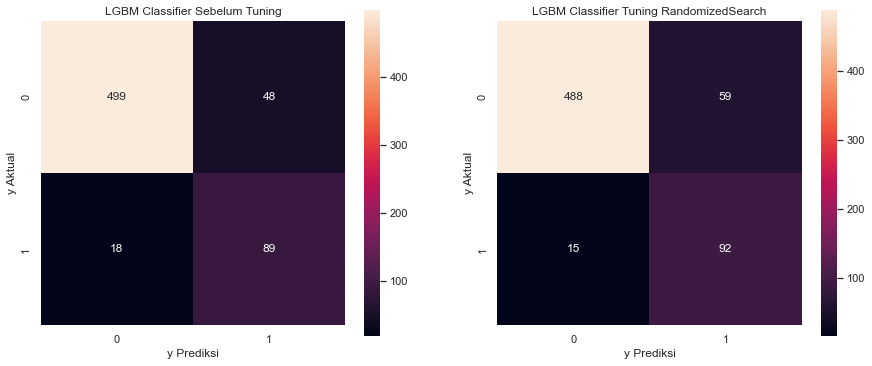

In [164]:
plt.figure(figsize=(15,6))


# Model LGBM Classifier Sebelum Tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('LGBM Classifier Sebelum Tuning')

# Model LGBM Classifier Sesudah Tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_randomsearch3), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('LGBM Classifier Tuning RandomizedSearch');

#### 9.1.2 Test dengan hasil GridSearch
    Data Scientist melakukan pengujian model yang telah melewati proses Hyperparameter tuning menggunakan GridSearch

In [180]:
# Menggunakan model hasil GridSearch ke - 4
model_grid = gridSearch_lgbm.best_estimator_
model_grid.fit(X_train, y_train)

y_pred_gridsearch = model_grid.predict(X_test)
fbeta_score(y_test, y_pred_gridsearch, beta=2) 

0.7773851590106007

Confusion Matrix GridSearch

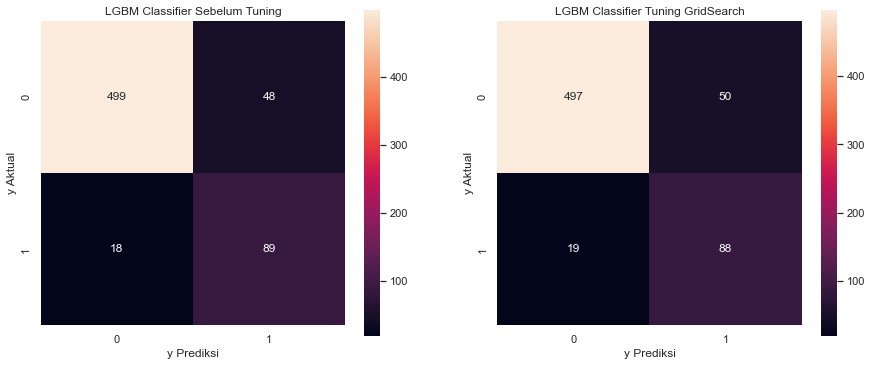

In [181]:
plt.figure(figsize=(15,6))


# Model LGBM Classifier Sebelum Tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('LGBM Classifier Sebelum Tuning')

# Model LGBM Classifier Sesudah Tuning dengan GridSearch
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearch), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('LGBM Classifier Tuning GridSearch');

#### 9.1.3 Kesimpulan Pengujian
    Data Scientist membandingkan hasil pengujian model LGBM antara base model, randomized model, dan grid model

In [310]:
# Report untuk Base Model LGBM
print(classification_report(y_test, y_pred_benchmark))

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       547
           1       0.52      0.87      0.65       107

    accuracy                           0.85       654
   macro avg       0.74      0.86      0.77       654
weighted avg       0.90      0.85      0.86       654



In [311]:
# Report untuk RandomizedSearch Model LGBM
print(classification_report(y_test, y_pred_randomsearch3))

              precision    recall  f1-score   support

           0       0.97      0.89      0.93       547
           1       0.61      0.86      0.71       107

    accuracy                           0.89       654
   macro avg       0.79      0.88      0.82       654
weighted avg       0.91      0.89      0.89       654



In [312]:
# Report untuk GridSearch Model LGBM
print(classification_report(y_test, y_pred_gridsearch))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94       547
           1       0.64      0.82      0.72       107

    accuracy                           0.89       654
   macro avg       0.80      0.87      0.83       654
weighted avg       0.91      0.89      0.90       654



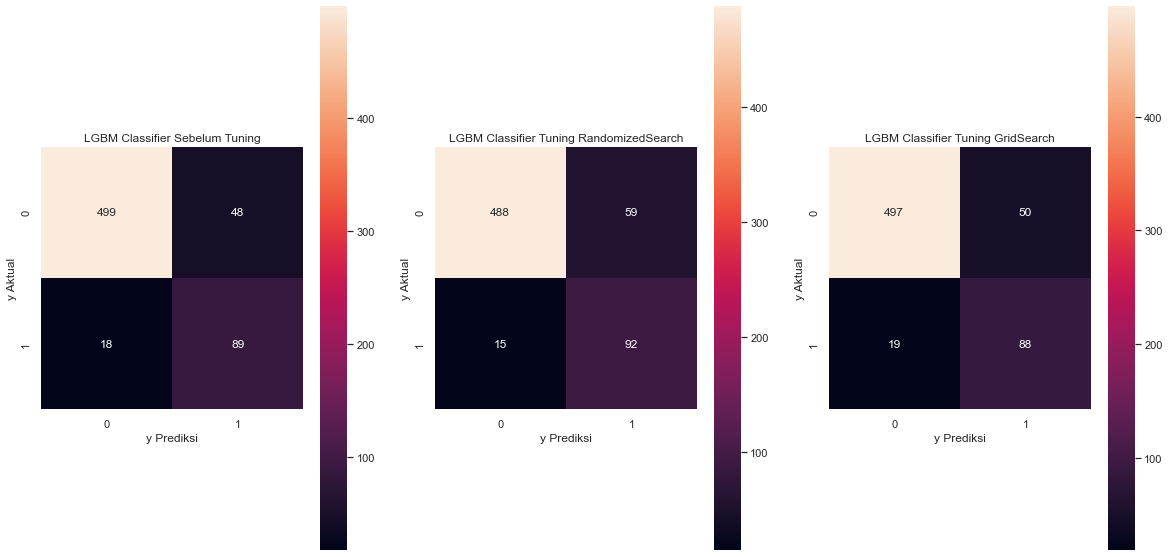

In [182]:
plt.figure(figsize=(20,10))


# Model LGBM Classifier Sebelum Tuning
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('LGBM Classifier Sebelum Tuning')

# Model LGBM Classifier Sesudah Tuning dengan RandomizedSearch
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_randomsearch3), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('LGBM Classifier Tuning RandomizedSearch');

# Model LGBM Classifier Sesudah Tuning dengan GridSearch
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearch), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('LGBM Classifier Tuning GridSearch');

### 9.2 Stacking Classifier Model
    Data Scientist melakukan pengujian model Stacking kepada data testset

Base Model Stacking

In [285]:
# define model
pipe_model = Pipeline([
    ('preprocessing', transformer),
    ('modeling', stacking)
    ])

# fitting
pipe_model.fit(X_train, y_train)

# predict
y_pred_benchmark_stack = pipe_model.predict(X_test)
fbeta_score(y_test, y_pred_benchmark_stack, beta=2)

0.7648026315789475

#### 9.2.1 Test dengan hasil Randomized Search
    Data Scientist melakukan pengujian model Stacking yang telah melewati proses Hyperparameter tuning menggunakan RandomizedSearch

In [286]:
# Menggunakan model terbaik hasil RandomizedSearch dengan 2000 kombinasi 
model_randomize_stack_2000 = randomSearch_stack1.best_estimator_
model_randomize_stack_2000.fit(X_train, y_train)

y_pred_randomsearch_stack = model_randomize_stack_2000.predict(X_test)
fbeta_score(y_test, y_pred_randomsearch_stack, beta=2) 

0.7608695652173912

Confusion Matrix Randomized Search

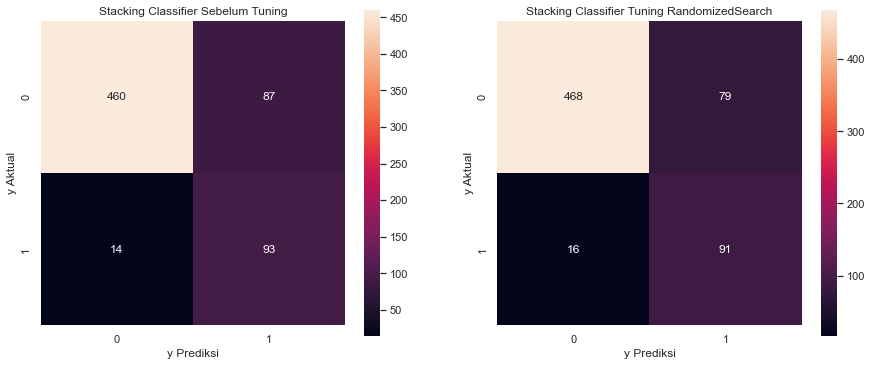

In [288]:
plt.figure(figsize=(15,6))


# Model Stacking Classifier Sebelum Tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark_stack), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Stacking Classifier Sebelum Tuning')

# Model Stacking Classifier Sesudah Tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_randomsearch_stack), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Stacking Classifier Tuning RandomizedSearch');

#### 9.2.2 Test dengan hasil GridSearch
    Data Scientist melakukan pengujian model Stacking yang telah melewati proses Hyperparameter tuning menggunakan GridSearch

In [289]:
# Menggunakan model terbaik hasil GridSearch dengan 2000 kombinasi 
model_Gridstack = gridSearch_stack.best_estimator_
model_Gridstack.fit(X_train, y_train)

y_pred_gridsearch_stack = model_Gridstack.predict(X_test)
fbeta_score(y_test, y_pred_gridsearch_stack, beta=2) 

0.7548701298701299

Confusion Matrix GridSearch

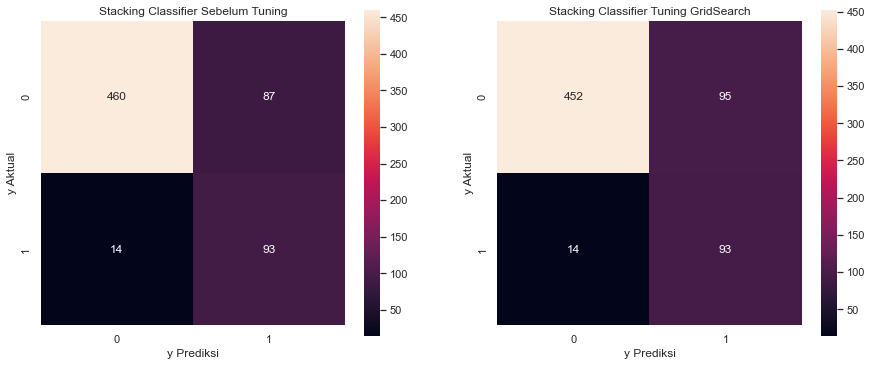

In [290]:
plt.figure(figsize=(15,6))


# Model Stacking Classifier Sebelum Tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark_stack), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Stacking Classifier Sebelum Tuning')

# Model Stacking Classifier Sesudah Tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearch_stack), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Stacking Classifier Tuning GridSearch');

#### 9.2.3 Kesimpulan Pengujian
    Data Scientist membandingkan hasil pengujian Stacking model antara base model, randomized model, dan grid model

In [ ]:
# Report untuk Base Model Stacking
print(classification_report(y_test, y_pred_randomsearch_stack))

In [429]:
# Report untuk RandomizedSearch Model Stacking
print(classification_report(y_test, y_pred_randomsearch_stack))

              precision    recall  f1-score   support

           0       0.97      0.86      0.91       547
           1       0.54      0.85      0.66       107

    accuracy                           0.85       654
   macro avg       0.75      0.85      0.78       654
weighted avg       0.90      0.85      0.87       654



In [430]:
# Report untuk GridSearch Model Stacking
print(classification_report(y_test, y_pred_gridsearch_stack))

              precision    recall  f1-score   support

           0       0.97      0.83      0.89       547
           1       0.49      0.87      0.63       107

    accuracy                           0.83       654
   macro avg       0.73      0.85      0.76       654
weighted avg       0.89      0.83      0.85       654



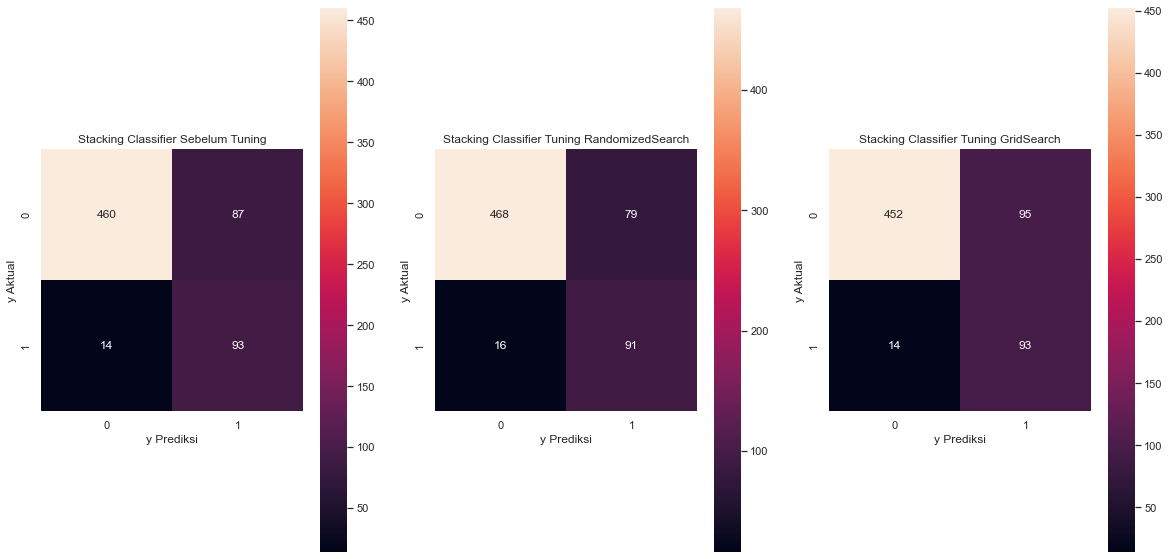

In [291]:
plt.figure(figsize=(20,10))


# Model Stacking Classifier Sebelum Tuning
plt.subplot(1,3,1)
sns.heatmap(confusion_matrix(y_test, y_pred_benchmark_stack), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Stacking Classifier Sebelum Tuning')

# Model Stacking Classifier Sesudah Tuning dengan RandomizedSearch
plt.subplot(1,3,2)
sns.heatmap(confusion_matrix(y_test, y_pred_randomsearch_stack), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Stacking Classifier Tuning RandomizedSearch');

# Model Stacking Classifier Sesudah Tuning dengan GridSearch
plt.subplot(1,3,3)
sns.heatmap(confusion_matrix(y_test, y_pred_gridsearch_stack), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('Stacking Classifier Tuning GridSearch');

## **ANALISA & PENENTUAN MODEL**
---
Data Scientist memilih F2 sebagai scoring, karena dengan F2 nilai recall dan precision diperhatikan. Melalui proses Cross Validation untuk menemukan model dengan scoring F2 terbaik, ditemukan 2 model terbaik yaitu: 

    - LGBM Classifier
    - Stacking Classifier

Sebagai base model yang terpilih, kedua model tersebut memiliki score rata-rata pada data pelatihan model:

    - LGBM Classifier       : 77.1
    - Stacking Classifier   : 73.3

Lalu Data Scientist melakukan proses Hyperparameter Tuning menggunakan RandomizedSearch dan GridSearch pada data pelatihan model, dan menemukan hasil:

    - LGBM Classifier       : 79.2 dan 79.4 (Menggunakan RandomizedSearch pada data untuk pelatihan model)
    - LGBM Classifier       : 78.1          (Menggunakan GridSearch pada data untuk pelatihan model)
    - Stacking Classifier   : 75.2          (Menggunakan RandomizedSearch pada data untuk pelatihan model)
    - Stacking Classifier   : 74.7          (Menggunakan GridSearch pada data untuk pelatihan model)

Dari hasil pembelajaran / pelatihan model, ditemukan model LGBM Classifier memiliki score yang lebih baik dari pada model Stacking Classifier. Namun tidak bisa diputuskan hanya berdasarkan score pada tahap pelatihan model, Data Scientist juga melakukan pengujian model kepada data ujian, dan menemukan hasil:

    - LGBM Classifier       : 78.7          (Base Model)
    - LGBM Classifier       : 79.2 dan 79.4 (Menggunakan RandomizedSearch Model)
    - LGBM Classifier       : 77.7          (Menggunakan GridSearch Model)
    
    - Stacking Classifier   : 76.4          (Base Model)
    - Stacking Classifier   : 76.0          (Menggunakan RandomizedSearch Model)
    - Stacking Classifier   : 75.4          (Menggunakan GridSearch Model)

Melalui data pengujian model tersebut, dapat dilihat bahwa base model LGBM dan Stacking sama-sama memiliki peningkatan. Hasil pelatihan LGBM menggunakan RandomizedSearch cenderung lebih stabil karena pada pengujian juga menghasilkan nilai sama yaitu 79.2 dan 79.4, sementara pengujian model LGBM yang menggunakan GridSearch mengalami penurunan dari nilai pelatihannya 78.1 --> 77.7 (tereliminasi). Hasil pelatihan Stacking menggunakan RandomizedSearch dan GridSearch mengalami peningkatan saat dilakukannya pengujian.
Namun dari hasil score pengujian tersebut, tetap bisa dilihat score model LGBM Classifier lebih baik dari pada model Stacking Classifier meskipun sama-sama meningkat.
Dengan mempertimbangkan score pelatihan dan pengujian yang cenderung lebih stabil, maka Data Scientist menentukan memilih model LGBM Classifier dengan Randomized Search.

Alasan LGBM Classifier dengan RandomizedSearch:

    - Score Base Model meningkat setelah dilakukannya pelatihan.
    - Score pelatihan model menghasilkan RandomizedScore lebih tinggi dari GridSearch.
    - Score Pelatihan Model dengan RandomizedScore, dengan score pengujian menghasilkan nilai sama yaitu 79.2 dan 79.4. Menandakan model lebih stabil.
    - Score Randomized LGBM pada pelatihan terdapat 79.2 dan 79.4. Sementara pada pengujian model yang memiliki score pelatihan 79.2 memiliki nilai pengujian yang lebih baik yaitu 79.4.
    - Data Scientist memilih model hasil pengujian ke 3 dengan score pengujian meningkat dari pelatihan yaitu dengan hasil score ujian 79.4.
---

## **PENJELASAN MODEL LGBM CLASSIFIER**
---
LGBMClassifier adalah sebuah algoritma klasifikasi yang menggunakan metode pembelajaran mesin berbasis pohon yang dikenal sebagai LightGBM. LightGBM merupakan sebuah library gradient boosting yang dikembangkan oleh Microsoft. LGBMClassifier adalah implementasi dari algoritma LightGBM untuk tugas klasifikasi.
Light Gradient Boosting Machine (LightGBM) merupakan sebuah metode gradient boosting yang cepat, terdistribusi dan memiliki high-performance berbasiskan decision tree. Light GBM merupakan salah satu metode ensemble yang melakukan agrerasi terhadap prediksi dari beberapa decision tree (dengan menambahkan setiap tree).

Light GBM merupakan implementasi Gradient Boosting Decision Tree (GBDT). Pada proses pelatihan setiap individual decision tree akan melakukan pemisahan data. LightGBM menggunakan dua strategi yaitu gradient-based one-side sampling (GOSS) dan leaf-wise growth. 
Konsep leaf-wise growth merupakan salah satu Teknik untuk membatasi depth dari model LightGBM, proses ini dilakukan untuk mencari node dengan splitting gains terbesar. Proses yang dilakukan selanjutnya adalah memecahkan node tersebut dan meneruskan untuk node yang baru. Model Light GBM tidak perlu menambahkan kedalaman model untuk menghindari penggunaan daya komputasi yang lebih besar dan juga mengurangi overfitting.

Keuntungan: 
1. Training speed yang lebih cepat dan efisien
2. Penggunaan memori yang minimal
3. Tingkat akurasi yang baik
4. Bisa mengatasi data berukuran besar 
5. Support untuk pembelajaran menggunakan GPU
6. Mengatasi data tidak seimbang 

## **No Machine Learning Vs With Machine Learning**
---
Pak Kevin memberikan budget pemotongan harga sebesar 70% untuk pelanggan yang akan Churn dan 30% untuk pelanggan yang loyal. Tim E-Commerce mengasumsikan harga barangnya adalah Rp 100.000, sehingga menghasilkan perhitungan:

    Pelanggan Loyal : Rp 30.000
    Pelanggan Churn : Rp 70.000

Sementara, diluar perhitungan tersebut terdapat pengetahuan dari Pak Kevin yaitu mencari pelanggan baru akan memakan biaya 5x - 25x lebih mahal dari pada biaya untuk menarik pelanggan menggunakan promo potongan harga. Maka Tim E-Commerce mengasumsikan lagi biaya perhitungannya, yaitu:

    Pelanggan Baru  : Rp 70.000 x 10 = Rp 700.000

Tim E-Commerce melaporkan ke Data Scientist biaya tersebut, dan memberi tahu bahwa perusahaan Lakü saat ini memiliki 3270 Pelanggan. Perusahaan memperlakukan mereka seolah-olah mereka adalah pelanggan loyal jadi perusahaan memberikan biaya potongan 30% (Asumsi : Rp 30.000).

Data Scientist membuat asumsi awal, yaitu:

    FP/False Positif: Machine Learning akan memprediksi pelanggan akan berhenti, namun pada kenyataannya pelanggan tetap loyal menggunakan E-Commerce Lakü. Jika seperti ini maka perusahaan akan menggeluarkan budget berlebih untuk pelanggan yang loyal.

    FN/False Negatif: Machine Learning akan memprediksi pelanggan loyal, namun pada kenyataannya pelanggan akan berhenti menggunakan E-Commerce Lakü. Jika seperti ini maka perusahaan akan mengeluarkan budget yang lebih hemat untuk pelanggan yang akan berhenti. Dengan resiko mencari pelanggan baru yang biayanya kita asumsikan saja berdasarkan pemahaman Pak Kevin, lebih mahal 10x dari biaya memberikan penawaran khusus. 

**Kondisi Perusahaan Tanpa Machine Learning**

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 547           | 0             |
| Actual (1)      | 107           | 0             |

- Pengeluaran perusahaan untuk semua pelanggan adalah (547 + 107) x Rp 30.000 = Rp 19.620.000
- Kerugian perusahaan untuk pelanggan hilang karena salah prediksi 107 x Rp 700.000 = Rp 74.900.000 (FN)
- Kerugian perusahaan Rp 19.620.000 - Rp 74.900.000 = -Rp 55.280.000

**Kondisi Perusahaan Dengan Machine Learning Base Model**

Setelah menggunakan machine learning dengan base model, perusahaan dapat memprediksi pelanggan Churn sehingga dapat memberikan promosi yang tepat sasaran:

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 499           | 48            |
| Actual (1)      | 18            | 89            |

- Perusahaan salah memprediksi pelanggan Loyal menjadi Churn 48 x Rp 70.000 = Rp 3.360.000, seharusnya 48 x Rp 30.000 = Rp 1.440.000 (sia-sia Rp 1.920.000) (FP)
- Perusahaan kehilangan pelanggan karena tidak terdeteksi Churn 18 x Rp 700.000 = Rp 12.600.000 (FN)
- Kerugian perusahaan dengan ML Base Model Rp 12.600.000 + Rp 1.920.000 = Rp 14.520.000

**Kondisi Perusahaan Dengan Machine Learning after tuning**

Setelah menggunakan machine learning dengan base model, perusahaan dapat memprediksi pelanggan Churn sehingga dapat memberikan promosi yang tepat sasaran:

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 488           | 59            |
| Actual (1)      | 15            | 92            |

- Perusahaan salah memprediksi pelanggan Loyal menjadi Churn 59 x Rp 70.000 = Rp 4.130.000, seharusnya 59 x Rp 30.000 = Rp 1.770.000 (sia-sia Rp 2.360.000) (FP)
- Perusahaan kehilangan pelanggan karena tidak terdeteksi Churn 15 x Rp 700.000 = Rp 10.500.000 (FN)
- Kerugian perusahaan dengan ML after tuning Model Rp 10.500.000 + Rp 2.360.000 = Rp 12.860.000

**Kerugian Menurun**
- Kerugian Perusahaan Sebelum ML            : Rp. 55.280.000
- Kerugian Perusahaan dengan ML Base Model  : Rp. 14.520.000
- Kerugian Perusahaan dengan ML Tune Model  : Rp. 12.860.000

Kesimpulan:

Machine Learning setelah di tuning, berhasil menurunkan kerugian perusahaan sebesar ((Rp 55.280.000 - Rp 12.860.000) / Rp 55.280.000) x 100 = 76%

## **10. Save Final Model**

Menyimpan Model Menggunakan Pickle

In [305]:
# Menyimpan model terpilih dari lgbm dengan tuning menggunakan RandomizedSearch
randomSearch_lgbm_tuning3 = randomSearch_lgbm3.best_estimator_
randomSearch_lgbm_tuning3

# Melakukan fitting
randomSearch_lgbm_tuning3.fit(X, y)

# Menyimpan model menggunakan Pickle
pickle.dump(randomSearch_lgbm_tuning3, open('model_lgbm_Final.sav', 'wb'))

In [306]:
# Memanggil Model yang telah disimpan
lgbmModel_Randomized_Final = pickle.load(open('model_lgbm_Final.sav', 'rb'))
lgbmModel_Randomized_Final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp_iter',
                                                  Pipeline(steps=[('imp_iter',
                                                                   KNNImputer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'CashbackAmount', 'Tenure',
                                                   'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('resampler', None),
                ('modeling',
                 LGBMClassifier(boosting_type='dart', class_weight='balanced',
                                learning_rate=0.26, max_depth=10,
                                n_estimators=300, num_leaves=8,
                                random_state=0))])

## **11. Precision Recall Curve**
---
    Data Scientist membuat precision recall curve untuk membantu memvisualisasikan bagaimana tiap treshold mempengaruhi performa dari model Classifier

In [313]:
# predict probabilities dengan model final
y_pred_proba = lgbmModel_Randomized_Final.predict_proba(X_test)

# keep probabilities for the positive outcome only
y_pred_proba = y_pred_proba[:, 1]

# memperhitungkan pr-curve
precision, recall, thresholds = precision_recall_curve(y_test, y_pred_proba)

In [314]:
# Membuat data frame untuk Precision Recall dan Threshold
df_PRCurve = pd.DataFrame({
    'precision': precision,
    'recall': recall,
    'thresholds': list(thresholds) + [0]
}).sort_values('precision', ascending=False)

df_PRCurve.head()

,precision,recall,thresholds
650,1.0,0.000000,0.000000
640,1.0,0.093458,0.988360
630,1.0,0.186916,0.976464
631,1.0,0.177570,0.977036
632,1.0,0.168224,0.979846


''

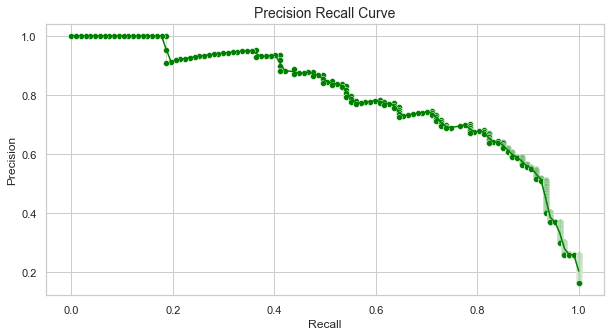

In [318]:
plt.figure(figsize=(10,5))

# Menampilkan Precision Recall Curve
sns.lineplot(data=df_PRCurve, x='recall', y='precision', color='g')
sns.scatterplot(data=df_PRCurve, x='recall', y='precision', color='g')

plt.xlabel('Recall')
plt.ylabel('Precision')

# Memberikan Judul
plt.title('Precision Recall Curve', size=14);

## **12. Optimized Threshold**
---
    Data Scientist melakukan optimasi threshold untuk menemukan titik nilai yang memberikan keseimbangan supaya kinerja model lebih optimal

In [308]:
# Nilai threshold yang akan dilakukan percobaan
list_threshold = np.arange(0.01, 1.00, 0.01)

# List untuk menyimpan nilai kerugian
list_loss = []

# Perulangan untuk nilai Threshold
for threshold in list_threshold:

    nilailoss = 0
    # predict
    y_pred_proba = lgbmModel_Randomized_Final.predict_proba(X_test)[:, 1]         # hasil prediksi dalam bentuk probability
    y_pred_class = np.where(y_pred_proba > threshold, 1, 0)                 # yg probability-nya di atas threshold masuk ke kelas 1 
     
    nilailoss = (confusion_matrix(y_test,y_pred_class)[0][1]*40000)  + (confusion_matrix(y_test,y_pred_class)[1][0]*700000)   # Perhitungan kerugian berdasarkan asumsi   
                # False Positive                                        # False Negative

    list_loss.append(nilailoss)

In [309]:
# Membuat data frame kerugian setelah optimize threshold
df_kerugian = pd.DataFrame()
df_kerugian['threshold'] = list_threshold                               # Menampilkan nilai threshold
df_kerugian['Total Kerugian'] = list_loss                               # Menampilkan jumlah kerugian

df_kerugian.sort_values(by='Total Kerugian', ascending= True).head()

,threshold,Total Kerugian
27,0.28,8740000
26,0.27,8820000
25,0.26,9100000
24,0.25,9220000
23,0.24,9260000


Text(0.5, 1.0, 'Optimized Threshold')

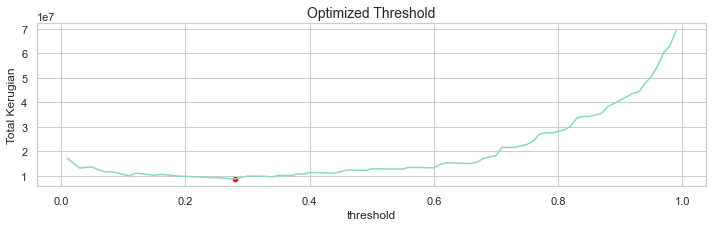

In [319]:
plt.figure(figsize=(12,3))

# Menampilkan lineplot
sns.lineplot(data=df_kerugian, x='threshold', y='Total Kerugian')

# Menandakan Kerugian terkecil
sns.scatterplot(x=[0.28],y=[8740000], color='r');

# Memberikan judul
plt.title('Optimized Threshold', size=14)

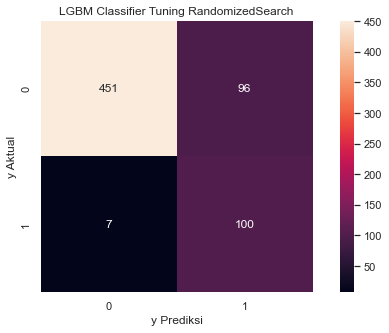

In [418]:
# Model LGBM Classifier Sesudah Tuning dengan RandomizedSearch dan menggunakan Best Threshold
plt.figure(figsize=(10,5))

# Menampilkan heatmap
sns.heatmap(confusion_matrix(y_test, np.where(y_pred_proba > 0.28, 1, 0)), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')

# Memberikan judul
plt.title('LGBM Classifier Tuning RandomizedSearch');

**Kondisi Perusahaan Dengan Machine Learning after tuning**

Setelah menggunakan machine learning dengan base model, perusahaan dapat memprediksi pelanggan Churn sehingga dapat memberikan promosi yang tepat sasaran:

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 488           | 59            |
| Actual (1)      | 15            | 92            |

- Perusahaan salah memprediksi pelanggan Loyal menjadi Churn 59 x Rp 70.000 = Rp 4.130.000, seharusnya 59 x Rp 30.000 = Rp 1.770.000 (sia-sia Rp 2.360.000) (FP)
- Perusahaan kehilangan pelanggan karena tidak terdeteksi Churn 15 x Rp 700.000 = Rp 10.500.000 (FN)
- Kerugian perusahaan dengan ML after tuning Model Rp 10.500.000 + Rp 2.360.000 = Rp 12.860.000

**Kondisi Perusahaan Dengan Machine Learning after tuning & Optimized treshold**

Setelah menggunakan machine learning dengan base model, perusahaan dapat memprediksi pelanggan Churn sehingga dapat memberikan promosi yang tepat sasaran:

|                 | Predicted (0) | Predicted (1) |
| :-------------: | :-----------: | :-----------: |
| Actual (0)      | 451           | 96            |
| Actual (1)      | 7             | 100            |

- Perusahaan salah memprediksi pelanggan Loyal menjadi Churn 96 x Rp 70.000 = Rp 6.720.000, seharusnya 96 x Rp 30.000 = Rp 2.880.000 (sia-sia Rp 3.840.000) (FP)
- Perusahaan kehilangan pelanggan karena tidak terdeteksi Churn 7 x Rp 700.000 = Rp 4.900.000 (FN)
- Kerugian perusahaan dengan ML after tuning Model & Optimized Treshold Rp 4.900.000 + Rp 3.840.000 = Rp 8.740.000

**Kerugian Menurun**
- Kerugian Perusahaan Sebelum ML            : Rp. 55.280.000
- Kerugian Perusahaan dengan ML Base Model  : Rp. 14.520.000
- Kerugian Perusahaan dengan ML Tune Model  : Rp. 12.860.000
- Kerugian Perusahaan dengan ML Tune & Optimize Treshold : Rp 8.740.000

Kesimpulan:

    Machine Learning setelah di tuning, berhasil menurunkan kerugian perusahaan sebesar ((Rp 55.280.000 - Rp 12.860.000) / Rp 55.280.000) x 100 = 76%
    Machine Learning setelah di tuning dan Optimize Treshold, berhasil menurunkan kerugian perusahaan sebesar ((Rp 55.280.000 - Rp 8.740.000) / Rp 55.280.000) x 100 = 84%

## **13. Feature Importance**
---
    Data Scientist melakukan teknik akhir yaitu, menampilkan score ke feature berdasarkan seberapa berguna feature tersebut terhadap memprediksi variabel target

In [357]:
lgbmModel_Randomized_Final

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('imp_iter',
                                                  Pipeline(steps=[('imp_iter',
                                                                   KNNImputer()),
                                                                  ('scaling',
                                                                   MinMaxScaler())]),
                                                  ['NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                                                   'CashbackAmount', 'Tenure',
                                                   'WarehouseToHome',
                                                   'DaySinceLastOrder']),
                                                 ('encoder', OneHotEncoder(),
                                                  ['PreferedOrderCat',
                                                   'MaritalStatus'])])),
                ('resampler', None),
                ('modeling',
                 LGBMClassifier(boosting_type='dart', class_weight='balanced',
                                learning_rate=0.26, max_depth=10,
                                n_estimators=300, num_leaves=8,
                                random_state=0))])

In [391]:
score = lgbmModel_Randomized_Final[2].feature_importances_
score

array([ 69, 176, 216, 395, 428, 248, 204,  27,  10,  39,  16,  14,   0,
        35,  45, 178])

In [372]:
lgbmModel_Randomized_Final[0]

ColumnTransformer(remainder='passthrough',
                  transformers=[('imp_iter',
                                 Pipeline(steps=[('imp_iter', KNNImputer()),
                                                 ('scaling', MinMaxScaler())]),
                                 ['NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'CashbackAmount', 'Tenure', 'WarehouseToHome',
                                  'DaySinceLastOrder']),
                                ('encoder', OneHotEncoder(),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

In [365]:
pipe_1 = lgbmModel_Randomized_Final[0].transformers_[0][1].get_feature_names_out()
pipe_1

array(['NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'CashbackAmount', 'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'],
      dtype=object)

In [373]:
pipe_2 = lgbmModel_Randomized_Final[0].transformers_[1][1].get_feature_names_out()
pipe_2

array(['PreferedOrderCat_Fashion', 'PreferedOrderCat_Grocery',
       'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile Phone', 'PreferedOrderCat_Others',
       'MaritalStatus_Divorced', 'MaritalStatus_Married',
       'MaritalStatus_Single'], dtype=object)

In [396]:
lgbmModel_Randomized_Final[0].transformers_[2][2]

[7]

In [412]:
remainder_cols = []
remainder_cols.append(X_train.columns[7])
remainder_cols

['Complain']

In [413]:
# Baris code ini berfungsi untuk menggabungkan dan menampilkan semua nama feature
all_features = list(pipe_1)+list(pipe_2)+remainder_cols
all_features

['NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'CashbackAmount',
 'Tenure',
 'WarehouseToHome',
 'DaySinceLastOrder',
 'PreferedOrderCat_Fashion',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Divorced',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Complain']

In [414]:
# Membuat dataframe yang berisikan nama featurenya dan score importancenya 
df_feat_importance = pd.DataFrame()
df_feat_importance['feature'] = all_features                                        # Menampilkan nama feature
df_feat_importance['importance'] = score                                            # Menampilkan score importancenya
df_feat_importance=df_feat_importance.sort_values('importance', ascending=False)    # Mengurutkan dari yang terbaik
df_feat_importance

,feature,importance
4,Tenure,428
3,CashbackAmount,395
5,WarehouseToHome,248
2,NumberOfAddress,216
6,DaySinceLastOrder,204
15,Complain,178
1,SatisfactionScore,176
0,NumberOfDeviceRegistered,69
14,MaritalStatus_Single,45
9,PreferedOrderCat_Laptop & Accessory,39


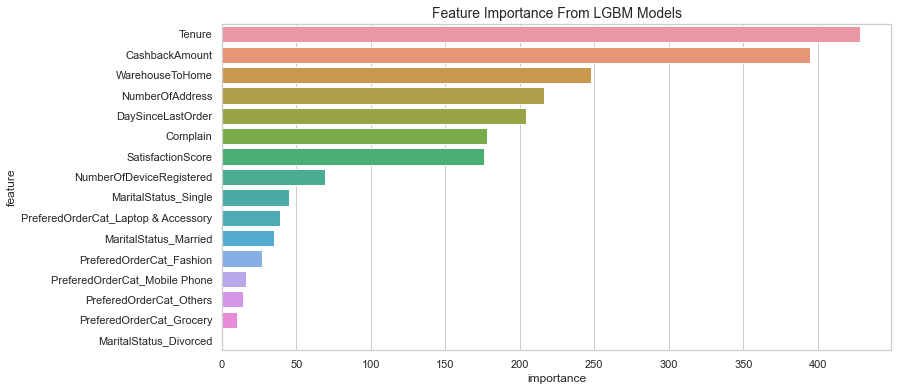

In [426]:
# Membuat visualisasi dengan barplot terkait feature importance dari LGBM Models
plt.figure(figsize=(12,6))
sns.barplot(
    data=df_feat_importance,
    x='importance',
    y='feature'
)
plt.title('Feature Importance From LGBM Models', size=14)
plt.show()

### 13.1 Hasil Feature Importance
---
Data Scientist ingin melihat feature dan memahami feature apa saja yang berpengaruh kepada model machine learning LGBM, ditemukan hasil:

    1. Feature **Tenure** merupakan feature yang paling relevan kepada target karena memiliki score terbesar yaitu 428.
    2. Feature lain yang tidak kalah penting untuk mempengaruhi hasil prediksi adalah **CashbackAmount** yang memiliki score 395.
    3. Feature lain yang memiliki pengaruh, namun tidak sebesar ke-2 feature diatas adalah **WarehouseToHome**, **NumberOfAddress**, dan *DaySinceLastOrder* dengan score yang cukup tinggi yaitu 248, 216, dan 204.
    4. Feature yang memiliki pengaruh juga, namun relatif lebih kecil lagi adalah **Complain** dan **SatisfactionScore** dengan score 178 dan 176.
    5. Sementara feature lain yang memiliki pengaruh paling kecil yaitu dengan score kurang dari 100 adalah **NumberOfDeviceRegistered**, **MaritalStatus_Single**, **PreferedOrderCat_Laptop & Accessory**, **MaritalStatus_Married**, **PreferedOrderCat_Fashion**, **PreferedOrderCat_Mobile Phone**, **PreferedOrderCat_Others**, dan **PreferedOrderCat_Grocery**.
    6. Feature yang tidak relevan dengan target adalah **MaritalStatus_Divorced** dengan score 0. yang berarti feature ini bisa dihapus/tidak digunakan.

## **14. Conclusion & Recommendation**

Conclusion
---
Model Terbaik yang terpilih adalah LGBM Classifier, dengan hasil:

TrainSet: 

    - Model Before Tune: 77.1
    - Model After Tune : 79.2

TestSet:

    - Model Before Tune: 78.7
    - Model After Tune : 79.4

Hyperparameter tuning berhasil meningkatkan F2 Score model pada Train set sebesar 2.1 dan pada Test set sebesar 0.7. 
Metric F2 score digunakan karena kerugian untuk FN lebih besar dari pada kerugian FP, sehingga jumlah hasil FN harus diminimalkan. Namun juga kita tetap mempertahankan FP untuk tidak sangat tinggi.

Dari segi bisnis dapat kita lihat dari feature importance **CashbackAmount** sangat berpengaruh. Oleh karena itu, saat ini mungkin perusahaan sudah betul untuk memberikan penawaran menarik kepada setiap pelanggannya.

Kesimpulan Perhitungan Biaya (No Machine Learning Vs With Machine Learning):

- Machine Learning setelah di tuning, berhasil menurunkan kerugian perusahaan sebesar ((Rp 55.280.000 - Rp 12.860.000) / Rp 55.280.000) x 100 = **76%**
- Machine Learning setelah di tuning dan Optimize Treshold, berhasil menurunkan kerugian perusahaan sebesar ((Rp 55.280.000 - Rp 8.740.000) / Rp 55.280.000) x 100 = **84%**

Recommendation
---
Data Scientist yang mengerjakan model ini, memberikan saran kepada Data Scientist selanjutnya yang akan mengerjakan model ini. Akan lebih baik, jika dicoba menggunakan model lain selain 10 model yang digunakan saat ini. Supaya mendapatkan perbandingan hasil model yang lebih baik.

Model saat ini sebetulnya masih banyak keterbatasan, karena hyperparameter tuning yang dilakukan kurang maksimal akibat hardware yang kurang mendukung. Disarankan untuk Data Scientist selanjutnya melakukan banyak kombinasi hyperparameter dengan GridSearch, untuk menemukan score yang maksimal.

Feature yang ditemukan saat ini, jika menurut Data Scientist selanjutnya tidak relevan. Akan lebih baik, jika feature tersebut dibuang. (Contoh: Feature dengan score 0 di feature importance)

Rekomendasi untuk Pak Kevin, selaku pemilik perusahaan. Bisa terlihat nilai ketidakpuasan perusahaan Lakü yaitu 61%, memang sudah bagus perusahaan memperlakukan pelanggannya dengan baik yaitu dengan cara memberikan promo, namun perusahaan harus tetap memperhatikan faktor-faktor lain yang mempengaruhi 61% pelanggan tidak puas tersebut.

## Mencoba Model ke Data Baru

In [436]:
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile Phone,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


In [437]:
# Membuat data frame berisikan data pelanggan baru
new_cust = pd.DataFrame({
    'Tenure':[16],
    'WarehouseToHome':[15],
    'NumberOfDeviceRegistered':[2],
    'PreferedOrderCat':['Fashion'],
    'SatisfactionScore':[4],
    'MaritalStatus':['Single'],
    'NumberOfAddress':[3],
    'Complain':[0],
    'DaySinceLastOrder':[5],
    'CashbackAmount':[150.23]
})

new_cust

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,16,15,2,Fashion,4,Single,3,0,5,150.23


In [438]:
# Melakukan prediksi dengan model final / model terpilih
lgbmModel_Randomized_Final.predict(new_cust)

array([0], dtype=int64)

Hasil prediksi ke pelanggan baru 0 artinya dia adalah pelanggan loyal.